# Project information

<p><strong>Title:</strong><br>
Examining the sports nutrition knowledge of large language model (LLM) artificial intelligence (AI) chatbots: an assessment of chatbot accuracy (validity), completeness, clarity, quality of cited evidence, and test-retest reliability.</p>

<p><strong>Authors:</strong><br>
Thomas Solomon PhD <sup>1</sup> and Matthew Laye PhD <sup>2</sup>.</p>

<p><strong>Affiliations:</strong><br>
<sup>1</sup> Blazon Scientific, UK.<br>
<sup>2</sup> Idaho Osteopathic College of Medicine, ID, USA.</p>

<p><strong>Aim:</strong><br>
This study aimed to compare the validity (accuracy), completeness, clarity/coherence, quality of cited evidence, and test-retest reliability of several publicly available chatbots — ChatGPT (OpenAI), Gemini (Google), and Claude (Anthropic) — in generating sports nutrition information.</p>

<p><strong>Hypothesis:</strong></p>
<ul>
    <li>The null hypothesis (Ho) was that AI chatbots cannot provide high-quality (valid/accurate, complete, clear/coherent, and reliable) sports nutrition information supported by high-quality evidence.</li>
    <li>The alternative hypothesis (H1) was that AI chatbots can provide high-quality (valid/accurate, complete, clear/coherent, and reliable) sports nutrition information supported by high-quality evidence.</li>
</ul>

<p><strong>Study Design:</strong></p>
<ul>
    <li>In Experiment 1, two types of prompts (simple and detailed) covering two domains (Sports nutrition to support training and Sports nutrition for racing) were entered into the LLM AI chatbots. The chatbot outputs were assessed against sports nutrition guidelines to rate accuracy, completeness, additional info quality, clarity/coherence, and quality of cited evidence. The test-retest reliability of these metrics was also determined.</li>
    <li>In Experiment 2, the same chatbots were challenged with exam questions and output accuracy and test-retest reliability of accuracy was determined.</li>
</ul>

<p>This notebook contains the R code used to analyze the data in <bold>Experiment 2</bold>.</p>

## Install R packages

In [50]:
# check R version
R.version.string

[1] "R version 4.5.0 (2025-04-11)"

In [51]:
# Define packages to install
packages_needed <- c('tidyverse', 'stats', 'broom', 'infer', 'ggpubr', 'ggthemes', 'gridExtra', 'patchwork', 'irr', 'lme4', 'car', 'data.table', 'reshape2')
# Install all packages that are not already installed
install.packages(setdiff(packages_needed, rownames(installed.packages())))
# Load packages
library(tidyverse)
library(stats)
library(broom)
library(infer)
library(ggpubr)
library(ggthemes) # for ggplot themes
library(gridExtra) # for plot arrangments
library(patchwork) # for plot arrangments
library(irr)
library(lme4)
library(car)
library(data.table)
library(reshape2)

# EXPERIMENT 2

## Inspect and preprocess the data

All txt files are arranged in two columns with a Question,Answer format. So, read these files and save them as CSV files.

In [52]:
# Load the datasets
Chatbot_A_Day1_Answer <- read.csv("/content/Experiment2_Chatbot_A_Day1_Answer.txt", header = TRUE, stringsAsFactors = FALSE)
Chatbot_A_Day2_Answer <- read.csv("/content/Experiment2_Chatbot_A_Day2_Answer.txt", header = TRUE, stringsAsFactors = FALSE)
Chatbot_B_Day1_Answer <- read.csv("/content/Experiment2_Chatbot_B_Day1_Answer.txt", header = TRUE, stringsAsFactors = FALSE)
Chatbot_B_Day2_Answer <- read.csv("/content/Experiment2_Chatbot_B_Day2_Answer.txt", header = TRUE, stringsAsFactors = FALSE)
Chatbot_C_Day1_Answer <- read.csv("/content/Experiment2_Chatbot_C_Day1_Answer.txt", header = TRUE, stringsAsFactors = FALSE)
Chatbot_C_Day2_Answer <- read.csv("/content/Experiment2_Chatbot_C_Day2_Answer.txt", header = TRUE, stringsAsFactors = FALSE)
Chatbot_D_Day1_Answer <- read.csv("/content/Experiment2_Chatbot_D_Day1_Answer.txt", header = TRUE, stringsAsFactors = FALSE)
Chatbot_D_Day2_Answer <- read.csv("/content/Experiment2_Chatbot_D_Day2_Answer.txt", header = TRUE, stringsAsFactors = FALSE)
Chatbot_E_Day1_Answer <- read.csv("/content/Experiment2_Chatbot_E_Day1_Answer.txt", header = TRUE, stringsAsFactors = FALSE)
Chatbot_E_Day2_Answer <- read.csv("/content/Experiment2_Chatbot_E_Day2_Answer.txt", header = TRUE, stringsAsFactors = FALSE)
Chatbot_F_Day1_Answer <- read.csv("/content/Experiment2_Chatbot_F_Day1_Answer.txt", header = TRUE, stringsAsFactors = FALSE)
Chatbot_F_Day2_Answer <- read.csv("/content/Experiment2_Chatbot_F_Day2_Answer.txt", header = TRUE, stringsAsFactors = FALSE)

# Reorder the datasets so the 'Question' column is in ascending order
Chatbot_A_Day1_Answer <- Chatbot_A_Day1_Answer[order(Chatbot_A_Day1_Answer$Question), ]
Chatbot_A_Day2_Answer <- Chatbot_A_Day2_Answer[order(Chatbot_A_Day2_Answer$Question), ]
Chatbot_B_Day1_Answer <- Chatbot_B_Day1_Answer[order(Chatbot_B_Day1_Answer$Question), ]
Chatbot_B_Day2_Answer <- Chatbot_B_Day2_Answer[order(Chatbot_B_Day2_Answer$Question), ]
Chatbot_C_Day1_Answer <- Chatbot_C_Day1_Answer[order(Chatbot_C_Day1_Answer$Question), ]
Chatbot_C_Day2_Answer <- Chatbot_C_Day2_Answer[order(Chatbot_C_Day2_Answer$Question), ]
Chatbot_D_Day1_Answer <- Chatbot_D_Day1_Answer[order(Chatbot_D_Day1_Answer$Question), ]
Chatbot_D_Day2_Answer <- Chatbot_D_Day2_Answer[order(Chatbot_D_Day2_Answer$Question), ]
Chatbot_E_Day1_Answer <- Chatbot_E_Day1_Answer[order(Chatbot_E_Day1_Answer$Question), ]
Chatbot_E_Day2_Answer <- Chatbot_E_Day2_Answer[order(Chatbot_E_Day2_Answer$Question), ]
Chatbot_F_Day1_Answer <- Chatbot_F_Day1_Answer[order(Chatbot_F_Day1_Answer$Question), ]
Chatbot_F_Day2_Answer <- Chatbot_F_Day2_Answer[order(Chatbot_F_Day2_Answer$Question), ]

# View the first few rows of each sorted datset and view the structure
cat("\n\n")
cat("Chatbot_A_Day1_Answer")
head(Chatbot_A_Day1_Answer)
str(Chatbot_A_Day1_Answer)
cat("\n\n")
cat("Chatbot_A_Day2_Answer")
head(Chatbot_A_Day2_Answer)
str(Chatbot_A_Day2_Answer)
cat("\n\n")
cat("Chatbot_B_Day1_Answer")
head(Chatbot_B_Day1_Answer)
str(Chatbot_B_Day1_Answer)
cat("\n\n")
cat("Chatbot_B_Day2_Answer")
head(Chatbot_B_Day2_Answer)
str(Chatbot_B_Day2_Answer)
cat("\n\n")
cat("Chatbot_C_Day1_Answer")
head(Chatbot_C_Day1_Answer)
str(Chatbot_C_Day1_Answer)
cat("\n\n")
cat("Chatbot_C_Day2_Answer")
head(Chatbot_C_Day2_Answer)
str(Chatbot_C_Day2_Answer)
cat("\n\n")
cat("Chatbot_D_Day1_Answer")
head(Chatbot_D_Day1_Answer)
str(Chatbot_D_Day1_Answer)
cat("\n\n")
cat("Chatbot_D_Day2_Answer")
head(Chatbot_D_Day2_Answer)
str(Chatbot_D_Day2_Answer)
cat("\n\n")
cat("Chatbot_E_Day1_Answer")
head(Chatbot_E_Day1_Answer)
str(Chatbot_E_Day1_Answer)
cat("\n\n")
cat("Chatbot_E_Day2_Answer")
head(Chatbot_E_Day2_Answer)
str(Chatbot_E_Day2_Answer)
cat("\n\n")
cat("Chatbot_F_Day1_Answer")
head(Chatbot_F_Day1_Answer)
str(Chatbot_F_Day1_Answer)
cat("\n\n")
cat("Chatbot_F_Day2_Answer")
head(Chatbot_F_Day2_Answer)
str(Chatbot_F_Day2_Answer)



Chatbot_A_Day1_Answer

,Question,Answer
,<int>,<chr>
83,1,A
51,2,D
77,3,A
99,4,D
66,5,E
19,6,B


'data.frame':	111 obs. of  2 variables:
 $ Question: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Answer  : chr  "A" "D" "A" "D" ...


Chatbot_A_Day2_Answer

,Question,Answer
,<int>,<chr>
83,1,A
51,2,D
77,3,A
99,4,D
66,5,E
19,6,B


'data.frame':	111 obs. of  2 variables:
 $ Question: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Answer  : chr  "A" "D" "A" "D" ...


Chatbot_B_Day1_Answer

,Question,Answer
,<int>,<chr>
83,1,A
51,2,C
77,3,A
99,4,B
66,5,A
19,6,B


'data.frame':	111 obs. of  2 variables:
 $ Question: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Answer  : chr  "A" "C" "A" "B" ...


Chatbot_B_Day2_Answer

,Question,Answer
,<int>,<chr>
83,1,A
51,2,C
77,3,A
99,4,D
66,5,A
19,6,B


'data.frame':	111 obs. of  2 variables:
 $ Question: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Answer  : chr  "A" "C" "A" "D" ...


Chatbot_C_Day1_Answer

,Question,Answer
,<int>,<chr>
10,1,A
43,2,C
88,3,A
83,4,D
80,5,E
62,6,A


'data.frame':	110 obs. of  2 variables:
 $ Question: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Answer  : chr  "A" "C" "A" "D" ...


Chatbot_C_Day2_Answer

,Question,Answer
,<int>,<chr>
10,1,A
71,3,A
66,4,D
63,5,E
45,6,A
46,7,A


'data.frame':	93 obs. of  2 variables:
 $ Question: int  1 3 4 5 6 7 8 9 10 11 ...
 $ Answer  : chr  "A" "A" "D" "E" ...


Chatbot_D_Day1_Answer

,Question,Answer
,<int>,<chr>
83,1,A
51,2,C
77,3,A
99,4,D
66,5,A
19,6,B


'data.frame':	111 obs. of  2 variables:
 $ Question: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Answer  : chr  "A" "C" "A" "D" ...


Chatbot_D_Day2_Answer

,Question,Answer
,<int>,<chr>
83,1,A
51,2,D
77,3,A
99,4,D
66,5,A
19,6,B


'data.frame':	111 obs. of  2 variables:
 $ Question: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Answer  : chr  "A" "D" "A" "D" ...


Chatbot_E_Day1_Answer

,Question,Answer
,<int>,<chr>
83,1,A
51,2,C
77,3,A
99,4,D
66,5,E
19,6,B


'data.frame':	111 obs. of  2 variables:
 $ Question: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Answer  : chr  "A " "C " "A " "D " ...


Chatbot_E_Day2_Answer

,Question,Answer
,<int>,<chr>
83,1,A
51,2,C
77,3,A
99,4,D
66,5,E
19,6,B


'data.frame':	111 obs. of  2 variables:
 $ Question: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Answer  : chr  "A " "C " "A " "D " ...


Chatbot_F_Day1_Answer

,Question,Answer
,<int>,<chr>
10,1,A
44,2,C
89,3,A
84,4,D
81,5,E
63,6,B


'data.frame':	111 obs. of  2 variables:
 $ Question: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Answer  : chr  "A" "C" "A" "D" ...


Chatbot_F_Day2_Answer

,Question,Answer
,<int>,<chr>
10,1,A
44,2,C
89,3,A
84,4,D
81,5,E
63,6,B


'data.frame':	111 obs. of  2 variables:
 $ Question: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Answer  : chr  "A" "C" "A" "D" ...


All datafiles contain 111 unique question-answer pairs, except for Chatbot_C_Day1_Answer and Chatbot_C_Day2_Answer, which have only 110 and 93 pairs, respectively.

In [53]:
# Define the expected range of question numbers (1 to 111)
expected_questions <- 1:111

# Locate missing questions for Chatbot_C_Day1_Answer
missing_questions_Chatbot_C_Day1_Answer <- setdiff(expected_questions, Chatbot_C_Day1_Answer$Question)
cat("Missing questions in Chatbot_C_Day1_Answer: ", missing_questions_Chatbot_C_Day1_Answer, "\n")

# Locate missing questions for Chatbot_C_Day2_Answer
missing_questions_Chatbot_C_Day2_Answer <- setdiff(expected_questions, Chatbot_C_Day2_Answer$Question)
cat("Missing questions in Chatbot_C_Day2_Answer: ", missing_questions_Chatbot_C_Day2_Answer, "\n")

Missing questions in Chatbot_C_Day1_Answer:  88 
Missing questions in Chatbot_C_Day2_Answer:  2 20 26 37 38 58 64 66 68 69 72 84 85 86 88 94 95 101 


In [54]:
# Now insert the missing question numbers into the dataframes
# First create a dataframe with missing questions and NA for the Answer column
missing_data_Chatbot_C_Day1_Answer <- data.frame(Question = missing_questions_Chatbot_C_Day1_Answer, Answer = NA)
missing_data_Chatbot_C_Day2_Answer <- data.frame(Question = missing_questions_Chatbot_C_Day2_Answer, Answer = NA)

# Then combine the original dataframe with the new rows for missing questions
Chatbot_C_Day1_Answer <- rbind(Chatbot_C_Day1_Answer, missing_data_Chatbot_C_Day1_Answer)
Chatbot_C_Day2_Answer <- rbind(Chatbot_C_Day2_Answer, missing_data_Chatbot_C_Day2_Answer)

# Then reorder the dataframe by the Question column
Chatbot_C_Day1_Answer <- Chatbot_C_Day1_Answer[order(Chatbot_C_Day1_Answer$Question), ]
Chatbot_C_Day2_Answer <- Chatbot_C_Day2_Answer[order(Chatbot_C_Day2_Answer$Question), ]

# Re-examine the updated dataframes
cat("Chatbot_C_Day1_Answer")
head(Chatbot_C_Day1_Answer)
str(Chatbot_C_Day1_Answer)
cat("\n\n")
cat("Chatbot_C_Day2_Answer")
head(Chatbot_C_Day2_Answer)
str(Chatbot_C_Day2_Answer)

Chatbot_C_Day1_Answer

,Question,Answer
,<int>,<chr>
10,1,A
43,2,C
88,3,A
83,4,D
80,5,E
62,6,A


'data.frame':	111 obs. of  2 variables:
 $ Question: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Answer  : chr  "A" "C" "A" "D" ...


Chatbot_C_Day2_Answer

,Question,Answer
,<int>,<chr>
10,1,A
110,2,NA
71,3,A
66,4,D
63,5,E
45,6,A


'data.frame':	111 obs. of  2 variables:
 $ Question: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Answer  : chr  "A" NA "A" "D" ...


In [55]:
# Merge the CSV files into a single CSV file
# Keep the 'Question' and 'Answer' columns from the first dataframe
Experiment2_merged_files <- Chatbot_A_Day1_Answer

# Rename the 'Answer' column in merged_data to 'Chatbot_A_Day1_Answer'
colnames(Experiment2_merged_files)[colnames(Experiment2_merged_files) == "Answer"] <- "Chatbot_A_Day1_Answer"

# Then, for each remaining dataframe, keep only the 'Answer' column and rename it to indicate which chatbotId and day it is from.
Experiment2_merged_files$Chatbot_A_Day2_Answer <- Chatbot_A_Day2_Answer$Answer
Experiment2_merged_files$Chatbot_B_Day1_Answer <- Chatbot_B_Day1_Answer$Answer
Experiment2_merged_files$Chatbot_B_Day2_Answer <- Chatbot_B_Day2_Answer$Answer
Experiment2_merged_files$Chatbot_C_Day1_Answer <- Chatbot_C_Day1_Answer$Answer
Experiment2_merged_files$Chatbot_C_Day2_Answer <- Chatbot_C_Day2_Answer$Answer
Experiment2_merged_files$Chatbot_D_Day1_Answer <- Chatbot_D_Day1_Answer$Answer
Experiment2_merged_files$Chatbot_D_Day2_Answer <- Chatbot_D_Day2_Answer$Answer
Experiment2_merged_files$Chatbot_E_Day1_Answer <- Chatbot_E_Day1_Answer$Answer
Experiment2_merged_files$Chatbot_E_Day2_Answer <- Chatbot_E_Day2_Answer$Answer
Experiment2_merged_files$Chatbot_F_Day1_Answer <- Chatbot_F_Day1_Answer$Answer
Experiment2_merged_files$Chatbot_F_Day2_Answer <- Chatbot_F_Day2_Answer$Answer

## View the data

In [56]:
# View head and structure of the merged CSV file
head(Experiment2_merged_files)
str(Experiment2_merged_files)

,Question,Chatbot_A_Day1_Answer,Chatbot_A_Day2_Answer,Chatbot_B_Day1_Answer,Chatbot_B_Day2_Answer,Chatbot_C_Day1_Answer,Chatbot_C_Day2_Answer,Chatbot_D_Day1_Answer,Chatbot_D_Day2_Answer,Chatbot_E_Day1_Answer,Chatbot_E_Day2_Answer,Chatbot_F_Day1_Answer,Chatbot_F_Day2_Answer
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
83,1,A,A,A,A,A,A,A,A,A,A,A,A
51,2,D,D,C,C,C,NA,C,D,C,C,C,C
77,3,A,A,A,A,A,A,A,A,A,A,A,A
99,4,D,D,B,D,D,D,D,D,D,D,D,D
66,5,E,E,A,A,E,E,A,A,E,E,E,E
19,6,B,B,B,B,A,A,B,B,B,B,B,B


'data.frame':	111 obs. of  13 variables:
 $ Question             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Chatbot_A_Day1_Answer: chr  "A" "D" "A" "D" ...
 $ Chatbot_A_Day2_Answer: chr  "A" "D" "A" "D" ...
 $ Chatbot_B_Day1_Answer: chr  "A" "C" "A" "B" ...
 $ Chatbot_B_Day2_Answer: chr  "A" "C" "A" "D" ...
 $ Chatbot_C_Day1_Answer: chr  "A" "C" "A" "D" ...
 $ Chatbot_C_Day2_Answer: chr  "A" NA "A" "D" ...
 $ Chatbot_D_Day1_Answer: chr  "A" "C" "A" "D" ...
 $ Chatbot_D_Day2_Answer: chr  "A" "D" "A" "D" ...
 $ Chatbot_E_Day1_Answer: chr  "A " "C " "A " "D " ...
 $ Chatbot_E_Day2_Answer: chr  "A " "C " "A " "D " ...
 $ Chatbot_F_Day1_Answer: chr  "A" "C" "A" "D" ...
 $ Chatbot_F_Day2_Answer: chr  "A" "C" "A" "D" ...


In [57]:
# Count missing values in each column
colSums(is.na(Experiment2_merged_files))

Question Chatbot_A_Day1_Answer Chatbot_A_Day2_Answer 
                    0                     0                     0 
Chatbot_B_Day1_Answer Chatbot_B_Day2_Answer Chatbot_C_Day1_Answer 
                    0                     0                     1 
Chatbot_C_Day2_Answer Chatbot_D_Day1_Answer Chatbot_D_Day2_Answer 
                   18                     0                     0 
Chatbot_E_Day1_Answer Chatbot_E_Day2_Answer Chatbot_F_Day1_Answer 
                    0                     0                     0 
Chatbot_F_Day2_Answer 
                    0

In [58]:
# Identify columns with missing values
missing_values_Experiment2 <- colSums(is.na(Experiment2_merged_files)) > 0

# Display columns with missing values
missing_columns_Experiment2 <- names(missing_values_Experiment2[missing_values_Experiment2])
print(missing_columns_Experiment2)

[1] "Chatbot_C_Day1_Answer" "Chatbot_C_Day2_Answer"


In [59]:
# Check the unique values in the Question column to verify that the "Question" column has the expected range of unique values (111)
length(unique(Experiment2_merged_files$Question))

[1] 111

## Rate the answers to the exam questions

In [60]:
# Load the correct answers
correct_answers <- read.csv("/content/Experiment2_Correct_answers.csv")

# view header and structure of correct_answers
head(correct_answers)
str(correct_answers)

,Question,Answer
,<int>,<chr>
1,1,A
2,2,C
3,3,A
4,4,D
5,5,E
6,6,B


'data.frame':	111 obs. of  2 variables:
 $ Question: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Answer  : chr  "A" "C" "A" "D" ...


The correct_answers dataframe contains 111 questions in the correct format

In [61]:
# Merge correct_answers with the merged_data_Experiment2 on the 'Question' column
# This will ensure that the correct answers are aligned with the corresponding questions
Experiment2_merged_files_with_answers <- merge(Experiment2_merged_files, correct_answers, by = "Question")

# Rename the 'Answer' column in merged_data to 'Chatbot_A_Day1_Answer'
colnames(Experiment2_merged_files_with_answers)[colnames(Experiment2_merged_files_with_answers) == "Answer"] <- "correctAnswer"

# view head
head(Experiment2_merged_files_with_answers)

,Question,Chatbot_A_Day1_Answer,Chatbot_A_Day2_Answer,Chatbot_B_Day1_Answer,Chatbot_B_Day2_Answer,Chatbot_C_Day1_Answer,Chatbot_C_Day2_Answer,Chatbot_D_Day1_Answer,Chatbot_D_Day2_Answer,Chatbot_E_Day1_Answer,Chatbot_E_Day2_Answer,Chatbot_F_Day1_Answer,Chatbot_F_Day2_Answer,correctAnswer
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,A,A,A,A,A,A,A,A,A,A,A,A,A
2,2,D,D,C,C,C,NA,C,D,C,C,C,C,C
3,3,A,A,A,A,A,A,A,A,A,A,A,A,A
4,4,D,D,B,D,D,D,D,D,D,D,D,D,D
5,5,E,E,A,A,E,E,A,A,E,E,E,E,E
6,6,B,B,B,B,A,A,B,B,B,B,B,B,B


In [62]:
# Create a function to compare each chatbot's answer to the correctAnswer, creating a new column for the score, awarding 1 if an answer is correct and 0 if an answer is incorrect.
# Scoring function
score_answers <- function(df) {
  # Identify the columns for chatbot answers
  chatbot_columns <- grep("Chatbot_", names(df), value = TRUE)

  # Loop through each chatbot column and calculate scores
  for (chatbot in chatbot_columns) {
    # Trim whitespace and handle NA values so that NA is assigned 0 (incorrect).
    df[[paste0(chatbot, "_score")]] <- ifelse(
      trimws(df[[chatbot]]) == trimws(df$correctAnswer) & !is.na(df[[chatbot]]),
      1,
      0
    )
  }

  return(df)
}

# Apply the scoring function
Experiment2_Chatbot_ratings <- score_answers(Experiment2_merged_files_with_answers)

# Display the first few rows of the updated dataframe
head(Experiment2_Chatbot_ratings)

,Question,Chatbot_A_Day1_Answer,Chatbot_A_Day2_Answer,Chatbot_B_Day1_Answer,Chatbot_B_Day2_Answer,Chatbot_C_Day1_Answer,Chatbot_C_Day2_Answer,Chatbot_D_Day1_Answer,Chatbot_D_Day2_Answer,Chatbot_E_Day1_Answer,⋯,Chatbot_B_Day1_Answer_score,Chatbot_B_Day2_Answer_score,Chatbot_C_Day1_Answer_score,Chatbot_C_Day2_Answer_score,Chatbot_D_Day1_Answer_score,Chatbot_D_Day2_Answer_score,Chatbot_E_Day1_Answer_score,Chatbot_E_Day2_Answer_score,Chatbot_F_Day1_Answer_score,Chatbot_F_Day2_Answer_score
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,A,A,A,A,A,A,A,A,A,⋯,1,1,1,1,1,1,1,1,1,1
2,2,D,D,C,C,C,NA,C,D,C,⋯,1,1,1,0,1,0,1,1,1,1
3,3,A,A,A,A,A,A,A,A,A,⋯,1,1,1,1,1,1,1,1,1,1
4,4,D,D,B,D,D,D,D,D,D,⋯,0,1,1,1,1,1,1,1,1,1
5,5,E,E,A,A,E,E,A,A,E,⋯,0,0,1,1,0,0,1,1,1,1
6,6,B,B,B,B,A,A,B,B,B,⋯,1,1,0,0,1,1,1,1,1,1


In [63]:
# Write the dataframe to a CSV file
write.csv(Experiment2_Chatbot_ratings, file = "Experiment2_Chatbot_ratings.csv", row.names = FALSE)

In [64]:
# Calculate the sum of each score column
score_sums <- colSums(Experiment2_Chatbot_ratings[, grep("_score$", names(Experiment2_Chatbot_ratings))], na.rm = TRUE)

# Display the sums of the score columns
score_sums

Chatbot_A_Day1_Answer_score Chatbot_A_Day2_Answer_score 
                         77                          80 
Chatbot_B_Day1_Answer_score Chatbot_B_Day2_Answer_score 
                         85                          89 
Chatbot_C_Day1_Answer_score Chatbot_C_Day2_Answer_score 
                         82                          68 
Chatbot_D_Day1_Answer_score Chatbot_D_Day2_Answer_score 
                         81                          78 
Chatbot_E_Day1_Answer_score Chatbot_E_Day2_Answer_score 
                         94                          96 
Chatbot_F_Day1_Answer_score Chatbot_F_Day2_Answer_score 
                         99                          98

## Examine internal consistency

In [65]:
# Calculate the Kuder-Richardson 20 (KR-20) statistic to determine the internal consistency reliability of the exam. NOTE: A high KR-20 value suggests that the items in the  exam are measuring the same underlying construct consistently. Therefore, the exam is effectively assessing the knowledge or skill it is designed to measure.
# Create a new datafrane containing only the score columns
Experiment2_Chatbot_scorecolumns <- Experiment2_Chatbot_ratings %>% select(ends_with("_score"))

# Number of items
K <- ncol(Experiment2_Chatbot_scorecolumns)

# Calculate the total score for each question
KR20_total_scores <- rowSums(Experiment2_Chatbot_scorecolumns)

# Calculate the proportion of correct answers for each item
proportion_correct <- colMeans(Experiment2_Chatbot_scorecolumns)

# Calculate the variance of the total scores
sigma_squared <- var(KR20_total_scores)

# Calculate KR-20
KR20 <- (K / (K - 1)) * (1 - (sum(proportion_correct * (1 - proportion_correct)) / sigma_squared))

# Function to interpret KR-20 value
interpret_kr20 <- function(KR20) {
  if (KR20 >= 0.90 && KR20 <= 1.00) {
    return("excellent reliability")
  } else if (KR20 >= 0.80 && KR20 < 0.90) {
    return("good reliability")
  } else if (KR20 >= 0.70 && KR20 < 0.80) {
    return("acceptable reliability")
  } else if (KR20 >= 0.60 && KR20 < 0.70) {
    return("questionable reliability")
  } else if (KR20 >= 0.50 && KR20 < 0.60) {
    return("poor reliability")
  } else {
    return("unacceptable reliability")
  }
}
# Interpret the KR-20 value
interpretation <- interpret_kr20(KR20)

# Print the interpretation
cat("KR-20 value =", round(KR20, 3), "\nThis indicates", interpretation, "\n")

KR-20 value = 0.895 
This indicates good reliability 


## Calculate accuracy scores

In [66]:
# The maximal possible Accuracy score <- 111 (1 mark for a correct answer to all 111 exam questions).
maximalAccuracyExamTotal <- 111

# Calculate the total Accuracy score for each LLM on each occasion (i.e. Test1 and Test2, the retest).
# NOTE: Total accuracy score <- the sum of correct answers divided by the maximal possible score. Therefore, Total accuracy score is a continuous value between 0 to 1.
  # TEST 1:
ChatbotA_ExamAccuracyTotalTest1 <- score_sums["Chatbot_A_Day1_Answer_score"] / maximalAccuracyExamTotal
ChatbotB_ExamAccuracyTotalTest1 <- score_sums["Chatbot_B_Day1_Answer_score"] / maximalAccuracyExamTotal
ChatbotC_ExamAccuracyTotalTest1 <- score_sums["Chatbot_C_Day1_Answer_score"] / maximalAccuracyExamTotal
ChatbotD_ExamAccuracyTotalTest1 <- score_sums["Chatbot_D_Day1_Answer_score"] / maximalAccuracyExamTotal
ChatbotE_ExamAccuracyTotalTest1 <- score_sums["Chatbot_E_Day1_Answer_score"] / maximalAccuracyExamTotal
ChatbotF_ExamAccuracyTotalTest1 <- score_sums["Chatbot_F_Day1_Answer_score"] / maximalAccuracyExamTotal
  # TEST 2:
ChatbotA_ExamAccuracyTotalTest2 <- score_sums["Chatbot_A_Day2_Answer_score"] / maximalAccuracyExamTotal
ChatbotB_ExamAccuracyTotalTest2 <- score_sums["Chatbot_B_Day2_Answer_score"] / maximalAccuracyExamTotal
ChatbotC_ExamAccuracyTotalTest2 <- score_sums["Chatbot_C_Day2_Answer_score"] / maximalAccuracyExamTotal
ChatbotD_ExamAccuracyTotalTest2 <- score_sums["Chatbot_D_Day2_Answer_score"] / maximalAccuracyExamTotal
ChatbotE_ExamAccuracyTotalTest2 <- score_sums["Chatbot_E_Day2_Answer_score"] / maximalAccuracyExamTotal
ChatbotF_ExamAccuracyTotalTest2 <- score_sums["Chatbot_F_Day2_Answer_score"] / maximalAccuracyExamTotal

# Print the scores
cat("Test1")
ChatbotA_ExamAccuracyTotalTest1
ChatbotB_ExamAccuracyTotalTest1
ChatbotC_ExamAccuracyTotalTest1
ChatbotD_ExamAccuracyTotalTest1
ChatbotE_ExamAccuracyTotalTest1
ChatbotF_ExamAccuracyTotalTest1
cat("\nTest2")
ChatbotA_ExamAccuracyTotalTest2
ChatbotB_ExamAccuracyTotalTest2
ChatbotC_ExamAccuracyTotalTest2
ChatbotD_ExamAccuracyTotalTest2
ChatbotE_ExamAccuracyTotalTest2
ChatbotF_ExamAccuracyTotalTest2

Test1

Chatbot_A_Day1_Answer_score 
                  0.6936937

Chatbot_B_Day1_Answer_score 
                  0.7657658

Chatbot_C_Day1_Answer_score 
                  0.7387387

Chatbot_D_Day1_Answer_score 
                  0.7297297

Chatbot_E_Day1_Answer_score 
                  0.8468468

Chatbot_F_Day1_Answer_score 
                  0.8918919


Test2

Chatbot_A_Day2_Answer_score 
                  0.7207207

Chatbot_B_Day2_Answer_score 
                  0.8018018

Chatbot_C_Day2_Answer_score 
                  0.6126126

Chatbot_D_Day2_Answer_score 
                  0.7027027

Chatbot_E_Day2_Answer_score 
                  0.8648649

Chatbot_F_Day2_Answer_score 
                  0.8828829

## Barplot

In [67]:
# Construct bar plot to visualise exam Accuracy for each LLM on each occasion (i.e. Test1 and Test2, the retest).

# First, combine the data from both Test 1 and Test 2 into one dataframe
exam_accuracy_totals <- data.frame(
  Chatbot = rep(c("A", "B", "C", "D", "E", "F"), 2),
  ExamTotalAccuracy = c(
    ChatbotA_ExamAccuracyTotalTest1, ChatbotB_ExamAccuracyTotalTest1, ChatbotC_ExamAccuracyTotalTest1,
    ChatbotD_ExamAccuracyTotalTest1, ChatbotE_ExamAccuracyTotalTest1, ChatbotF_ExamAccuracyTotalTest1,
    ChatbotA_ExamAccuracyTotalTest2, ChatbotB_ExamAccuracyTotalTest2, ChatbotC_ExamAccuracyTotalTest2,
    ChatbotD_ExamAccuracyTotalTest2, ChatbotE_ExamAccuracyTotalTest2, ChatbotF_ExamAccuracyTotalTest2
  ),
  Test = rep(c("Test 1", "Test 2"), each = 6)
)

# Then, calculate the standard error of the proportion of correct answers to visualise as an error bar on the barplot where SE = sqrt (p(1-p)/n) where p = proportion of correct answers and n = number of questions
# note that n is the maximalAccuracyExamTotal (111, defined earlier in code)
exam_accuracy_totals <- exam_accuracy_totals %>%
  mutate(SE = sqrt(ExamTotalAccuracy * (1 - ExamTotalAccuracy) / maximalAccuracyExamTotal))  # the standard error of the proportion of correct answers

# View exam_accuracy_totals
exam_accuracy_totals

,Chatbot,ExamTotalAccuracy,Test,SE
,<chr>,<dbl>,<chr>,<dbl>
Chatbot_A_Day1_Answer_score,A,0.6936937,Test 1,0.04375225
Chatbot_B_Day1_Answer_score,B,0.7657658,Test 1,0.04019867
Chatbot_C_Day1_Answer_score,C,0.7387387,Test 1,0.04169860
Chatbot_D_Day1_Answer_score,D,0.7297297,Test 1,0.04215205
Chatbot_E_Day1_Answer_score,E,0.8468468,Test 1,0.03418251
Chatbot_F_Day1_Answer_score,F,0.8918919,Test 1,0.02947296
Chatbot_A_Day2_Answer_score,A,0.7207207,Test 2,0.04258350
Chatbot_B_Day2_Answer_score,B,0.8018018,Test 2,0.03783745
Chatbot_C_Day2_Answer_score,C,0.6126126,Test 2,0.04623855


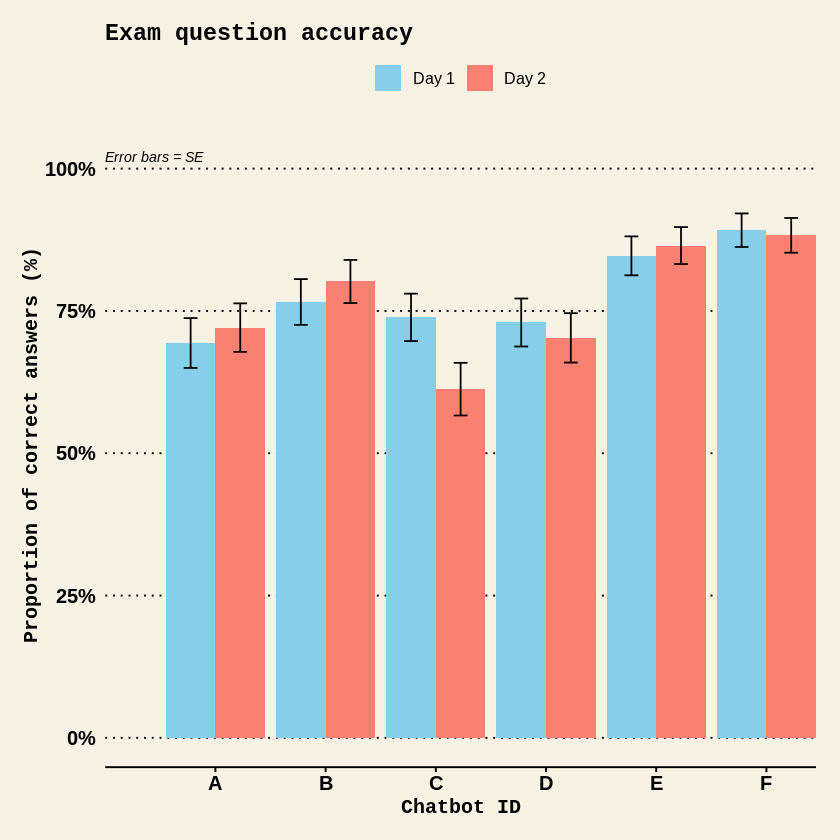

In [68]:
# Create the combined plot for both Test 1 and Test 2
accuracyplot_BLINDED <- ggplot(exam_accuracy_totals, aes(x = Chatbot, y = ExamTotalAccuracy, fill = Test)) +
  geom_bar(stat = "identity", position = "dodge") +  # Create side-by-side bars
  geom_errorbar(aes(ymin = ExamTotalAccuracy - SE, ymax = ExamTotalAccuracy + SE),
                position = position_dodge(0.9), width = 0.25) +  # Add error bars
  labs(
       title = "Exam question accuracy",
       x = "Chatbot ID",
       y = "Proportion of correct answers (%)" ,
    fill = "Test"  # This sets the title of the fill legend
  ) +
  scale_y_continuous(labels = scales::percent_format(accuracy = 1), limits = c(0, 1.03)) +  # Adjust y-axis
  scale_x_discrete(expand = expansion(add = c(0, 0))) +  # Adjust space between factors on the x-axis
  scale_fill_manual(values = c("Test 1" = "skyblue", "Test 2" = "salmon"), labels = c("Day 1", "Day 2")) + # Set colors and labels
  theme_wsj() +
  theme(
    plot.title = element_text(size = 14, face = "bold", hjust = 0),
    axis.text.x = element_text(color = "black", angle = 0, hjust = 0.5, size = 12),
    axis.title.x = element_text(color = "black", face = "bold", size = 12),
    axis.text.y = element_text(color = "black", size = 12),
    axis.title.y = element_text(color = "black", face = "bold", size = 12)
  ) +
  guides(fill = guide_legend(title = NULL)) + # Remove legend title
  annotate( # Add custom text
    "text",
    x = 0, y = 1.03,  # Coordinates for placement
    label = "Error bars = SE",
    hjust = 0, vjust = 1,  # Horizontal and vertical justification (aligns the text to the left and top)
    size = 3, fontface = "italic", color = "black"
  )

accuracyplot_BLINDED

## Statistical analyses

### Prepare the data

In [69]:
# For LMMs and ANOVAs, I need the data in the long format.
# Need to:
# 1. Add a new column called ExamDomain with 3 levels (A, B, and A = Exercise and performance nutrition, B = Clinical sports nutrition, and C = Nutrition operation and management).
# 2. Stack all columns ending in "_Answer_score" into a single column called Correct_answer
# 3. Transpose the _Answer_score columns and add new columns called ChatbotID and TestDay

# First drop all columns in Experiment2_Chatbot_ratings ending with "_Answer" and create the new df, Experiment2_forLMM
Experiment2_Chatbot_ratings_AnswerOnly <- Experiment2_Chatbot_ratings %>%
  select(-ends_with("_Answer"), -correctAnswer)

# Then add a ExamDomain column (A, B, or C)
Experiment2_Chatbot_ratings_AnswerOnly <- Experiment2_Chatbot_ratings_AnswerOnly %>%
  mutate(ExamDomain = case_when(
    Question %in% c(1, 2, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 38, 40, 3, 12, 23, 24, 26, 27,
                    28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 44, 45, 41, 43, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
                    59, 111, 4, 46, 47, 60, 61, 62, 63, 64, 65, 66, 67, 68, 109) ~ "A",
    Question %in% c(5, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 108, 110, 80, 81, 82, 83, 84, 85, 86, 87, 42, 95,
                    96, 97, 98, 99, 100, 101, 39, 88, 89, 90, 91, 92, 93, 94) ~ "B",
    Question %in% c(102, 105, 106, 107, 6, 103, 104) ~ "C",
    TRUE ~ NA_character_  # Default to NA if no match
  ))
# View structure
str(Experiment2_Chatbot_ratings_AnswerOnly)

'data.frame':	111 obs. of  14 variables:
 $ Question                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Chatbot_A_Day1_Answer_score: num  1 0 1 1 1 1 1 1 1 1 ...
 $ Chatbot_A_Day2_Answer_score: num  1 0 1 1 1 1 1 1 1 1 ...
 $ Chatbot_B_Day1_Answer_score: num  1 1 1 0 0 1 1 1 0 1 ...
 $ Chatbot_B_Day2_Answer_score: num  1 1 1 1 0 1 1 1 1 1 ...
 $ Chatbot_C_Day1_Answer_score: num  1 1 1 1 1 0 1 1 1 0 ...
 $ Chatbot_C_Day2_Answer_score: num  1 0 1 1 1 0 0 1 1 1 ...
 $ Chatbot_D_Day1_Answer_score: num  1 1 1 1 0 1 1 1 1 1 ...
 $ Chatbot_D_Day2_Answer_score: num  1 0 1 1 0 1 1 1 1 1 ...
 $ Chatbot_E_Day1_Answer_score: num  1 1 1 1 1 1 1 1 1 1 ...
 $ Chatbot_E_Day2_Answer_score: num  1 1 1 1 1 1 1 1 1 1 ...
 $ Chatbot_F_Day1_Answer_score: num  1 1 1 1 1 1 1 1 1 1 ...
 $ Chatbot_F_Day2_Answer_score: num  1 1 1 1 1 1 1 1 1 1 ...
 $ ExamDomain                 : chr  "A" "A" "A" "A" ...


In [70]:
# Then, Stack all columns ending in "_Answer_score" into a single column called Correct_answer and add new columns called ChatbotID (A to F) and TestDay (Test1 and Test2) corresponding to the original columnns
Experiment2_forLMM <- Experiment2_Chatbot_ratings_AnswerOnly %>%
  # Pivot to long format
  pivot_longer(
    cols = ends_with("_Answer_score"),  # Select columns ending with "_Answer_score"
    names_to = "Variable",             # Temporary column to hold original column names
    values_to = "Correct_answer"       # Column to store stacked values
  ) %>%
  # Extract ChatbotID and TestDay from the 'Variable' column
  mutate(
    ChatbotID = case_when(
      grepl("Chatbot_A", Variable) ~ "ChatbotA",
      grepl("Chatbot_B", Variable) ~ "ChatbotB",
      grepl("Chatbot_C", Variable) ~ "ChatbotC",
      grepl("Chatbot_D", Variable) ~ "ChatbotD",
      grepl("Chatbot_E", Variable) ~ "ChatbotE",
      grepl("Chatbot_F", Variable) ~ "ChatbotF"
    ),
    TestDay = case_when(
      grepl("Day1", Variable) ~ "Test1",
      grepl("Day2", Variable) ~ "Test2"
    )
  ) %>%
  # Drop the temporary 'Variable' column
  select(-Variable)

# View the transformed dataframe
cat("\n\n Correct_answer data in long format for ANOVA and Logistic Mixed Modeling:\n")
Experiment2_forLMM
str(Experiment2_forLMM)



 Correct_answer data in long format for ANOVA and Logistic Mixed Modeling:


Question,ExamDomain,Correct_answer,ChatbotID,TestDay
<int>,<chr>,<dbl>,<chr>,<chr>
1,A,1,ChatbotA,Test1
1,A,1,ChatbotA,Test2
1,A,1,ChatbotB,Test1
1,A,1,ChatbotB,Test2
1,A,1,ChatbotC,Test1
1,A,1,ChatbotC,Test2
1,A,1,ChatbotD,Test1
1,A,1,ChatbotD,Test2
1,A,1,ChatbotE,Test1


tibble [1,332 × 5] (S3: tbl_df/tbl/data.frame)
 $ Question      : int [1:1332] 1 1 1 1 1 1 1 1 1 1 ...
 $ ExamDomain    : chr [1:1332] "A" "A" "A" "A" ...
 $ Correct_answer: num [1:1332] 1 1 1 1 1 1 1 1 1 1 ...
 $ ChatbotID     : chr [1:1332] "ChatbotA" "ChatbotA" "ChatbotB" "ChatbotB" ...
 $ TestDay       : chr [1:1332] "Test1" "Test2" "Test1" "Test2" ...


In [71]:
# Convert the specified columns to factors
Experiment2_forLMM$ChatbotID <- as.factor(Experiment2_forLMM$ChatbotID)
Experiment2_forLMM$TestDay <- as.factor(Experiment2_forLMM$TestDay)
Experiment2_forLMM$ExamDomain <- as.factor(Experiment2_forLMM$ExamDomain)

# Check the structure to confirm the conversion
str(Experiment2_forLMM)

tibble [1,332 × 5] (S3: tbl_df/tbl/data.frame)
 $ Question      : int [1:1332] 1 1 1 1 1 1 1 1 1 1 ...
 $ ExamDomain    : Factor w/ 3 levels "A","B","C": 1 1 1 1 1 1 1 1 1 1 ...
 $ Correct_answer: num [1:1332] 1 1 1 1 1 1 1 1 1 1 ...
 $ ChatbotID     : Factor w/ 6 levels "ChatbotA","ChatbotB",..: 1 1 2 2 3 3 4 4 5 5 ...
 $ TestDay       : Factor w/ 2 levels "Test1","Test2": 1 2 1 2 1 2 1 2 1 2 ...


In [72]:
# Cross-check some values to ensure the df transformation is correct

# Function to cross-check values
cross_check <- function(Experiment2_Chatbot_ratings_AnswerOnly, Experiment2_forLMM, n = 5) {
  # Randomly sample 'n' rows from the transformed dataframe
  sample_rows <- Experiment2_forLMM %>%
    sample_n(n)

  # Cross-check each row
  sample_rows %>%
    rowwise() %>%
    mutate(
      # Build the column name from ChatbotID and TestDay
      Original_Column = paste0(
        gsub("Chatbot", "Chatbot_", ChatbotID), "_",
        ifelse(TestDay == "Test1", "Day1", "Day2"),
        "_Answer_score"
      ),
      # Extract the value from the original dataframe
      Original_Value = Experiment2_Chatbot_ratings_AnswerOnly[Question, Original_Column],
      # Compare the values
      Match = (Correct_answer == Original_Value)
    ) %>%
    ungroup() %>%
    select(Question, ChatbotID, TestDay, Correct_answer, Original_Value, Match)
}

# Run the cross-check function with 5 random samples.
# If all values match (Match = TRUE), it confirms the transformation is correct. If discrepancies are found (Match = FALSE), you can investigate further.
cross_check(Experiment2_Chatbot_ratings_AnswerOnly, Experiment2_forLMM, n = 5)

Question,ChatbotID,TestDay,Correct_answer,Original_Value,Match
<int>,<fct>,<fct>,<dbl>,<dbl>,<lgl>
23,ChatbotF,Test2,1,1,TRUE
106,ChatbotC,Test1,1,1,TRUE
26,ChatbotB,Test1,1,1,TRUE
81,ChatbotE,Test1,1,1,TRUE
40,ChatbotA,Test2,1,1,TRUE


The transformation looks good; all answers are TRUE

### Logistic mixed model

In [73]:
# Load required packages
library(lme4)
install.packages("lmerTest")
library(lmerTest)  # Provides p-values for fixed effects
install.packages("parameters")
library(parameters)  # Provides model_parameters

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### LLM Model 1

In [74]:
# Compare Correct_answer within (test-retest reliability) and between chatbots using mixed-methods repeated-measures ANOVAs (logistic mixed model with a binomial distribution for the binary outcome, Answer_score: 1 = correct, 0 = incorrect).
# Fixed effects:
# Set ChatbotID, TestDay, ExamDomain, and their interactions set as fixed effects (main effects and interactions).
# Random effects:
#   Model_1 - Set intercept for ChatbotID as a random effect (random intercept).
#   Model_2 - Set intercept for ChatbotID as a random effect (random intercept) and set random slopes for TestDay set as a random effect.

# Fit logistic mixed-effects models
LMM_Model_1 <- glmer(Correct_answer ~ ChatbotID + TestDay + ExamDomain + (1 | ChatbotID),
               data = Experiment2_forLMM,
               family = binomial)

# Summary of the models and model parameters
cat("\n\n LMM_Model_1 \n")
summary(LMM_Model_1)
model_parameters(LMM_Model_1)

boundary (singular) fit: see help('isSingular')





 LMM_Model_1 


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Correct_answer ~ ChatbotID + TestDay + ExamDomain + (1 | ChatbotID)
   Data: Experiment2_forLMM

      AIC       BIC    logLik -2*log(L)  df.resid 
   1338.7    1390.6    -659.4    1318.7      1322 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6305  0.2754  0.4306  0.5340  0.9945 

Random effects:
 Groups    Name        Variance Std.Dev.
 ChatbotID (Intercept) 0        0       
Number of obs: 1332, groups:  ChatbotID, 6

Fixed effects:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)        1.33857    0.18012   7.432 1.07e-13 ***
ChatbotIDChatbotB  0.43024    0.22633   1.901 0.057308 .  
ChatbotIDChatbotC -0.15768    0.21240  -0.742 0.457864    
ChatbotIDChatbotD  0.04673    0.21619   0.216 0.828864    
ChatbotIDChatbotE  0.94692    0.24756   3.825 0.000131 ***
ChatbotIDChatbotF  1.24019    0.26444   4.690 2.73e-06 

Parameter,Coefficient,SE,CI,CI_low,CI_high,z,df_error,p,Effects,Group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
(Intercept),1.33856528,0.1801162,0.95,0.98554397,1.6915866,7.4316753,Inf,1.072308e-13,fixed,
ChatbotIDChatbotB,0.43024313,0.2263299,0.95,-0.01335527,0.8738415,1.9009560,Inf,5.730778e-02,fixed,
ChatbotIDChatbotC,-0.15767645,0.2123962,0.95,-0.57396536,0.2586125,-0.7423695,Inf,4.578635e-01,fixed,
ChatbotIDChatbotD,0.04673076,0.2161874,0.95,-0.37698873,0.4704502,0.2161586,Inf,8.288641e-01,fixed,
ChatbotIDChatbotE,0.94691897,0.2475639,0.95,0.46170272,1.4321352,3.8249483,Inf,1.307995e-04,fixed,
ChatbotIDChatbotF,1.24019074,0.2644395,0.95,0.72189877,1.7584827,4.6898840,Inf,2.733600e-06,fixed,
TestDayTest2,-0.08384489,0.1365360,0.95,-0.35145050,0.1837607,-0.6140864,Inf,5.391583e-01,fixed,
ExamDomainB,-1.08609011,0.1403864,0.95,-1.36124244,-0.8109378,-7.7364327,Inf,1.022451e-14,fixed,
ExamDomainC,0.16861958,0.3305307,0.95,-0.47920864,0.8164478,0.5101480,Inf,6.099477e-01,fixed,


##### Check assumptions

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



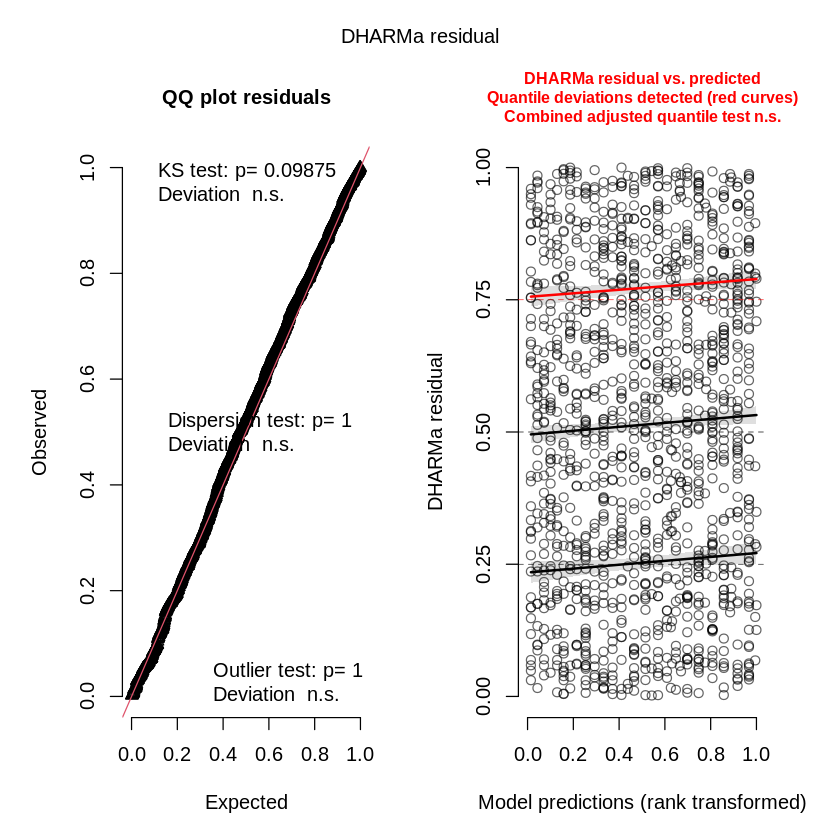

In [75]:
# Check assumptions in mixed model by inspecting the residual diagnostics using the DHARMa package

# install DHARMa
install.packages("DHARMa")
library(DHARMa)

# simulate residuals
sim_res_LMM_Model_1 <- simulateResiduals(fittedModel = LMM_Model_1, plot = TRUE)

<p>QQ plot is a straight line (no curved or stepped line) so residuals are ok.
<p>The residuals vs predicted plot is a random scatter (no peaks or skew) so residuals are ok.


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  simulationOutput$scaledResiduals
D = 0.033604, p-value = 0.09875
alternative hypothesis: two-sided


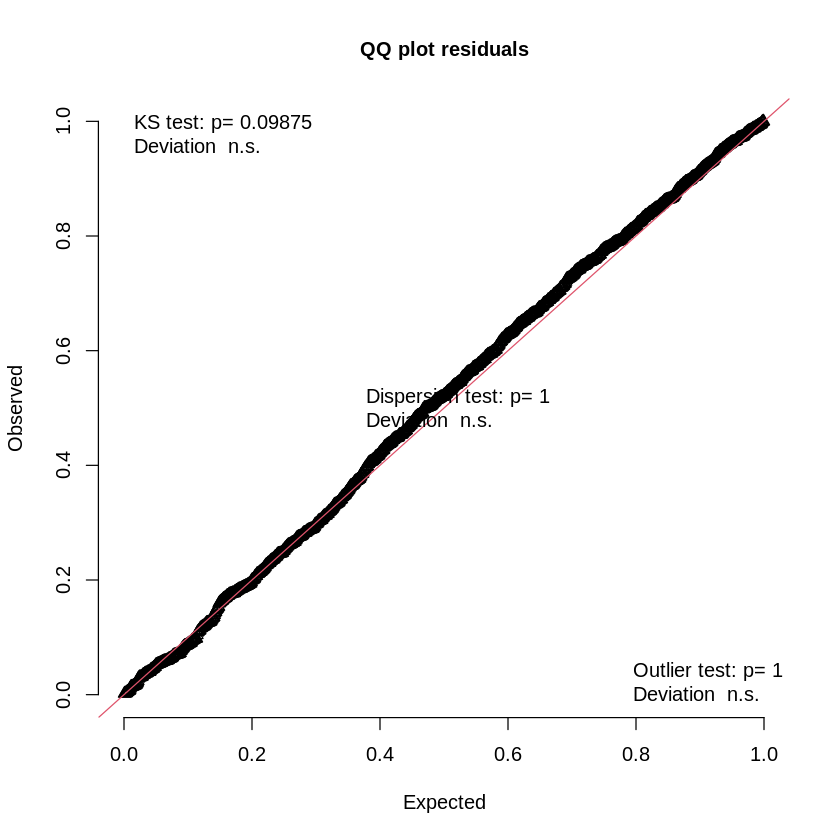


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 1.0013, p-value = 1
alternative hypothesis: two.sided


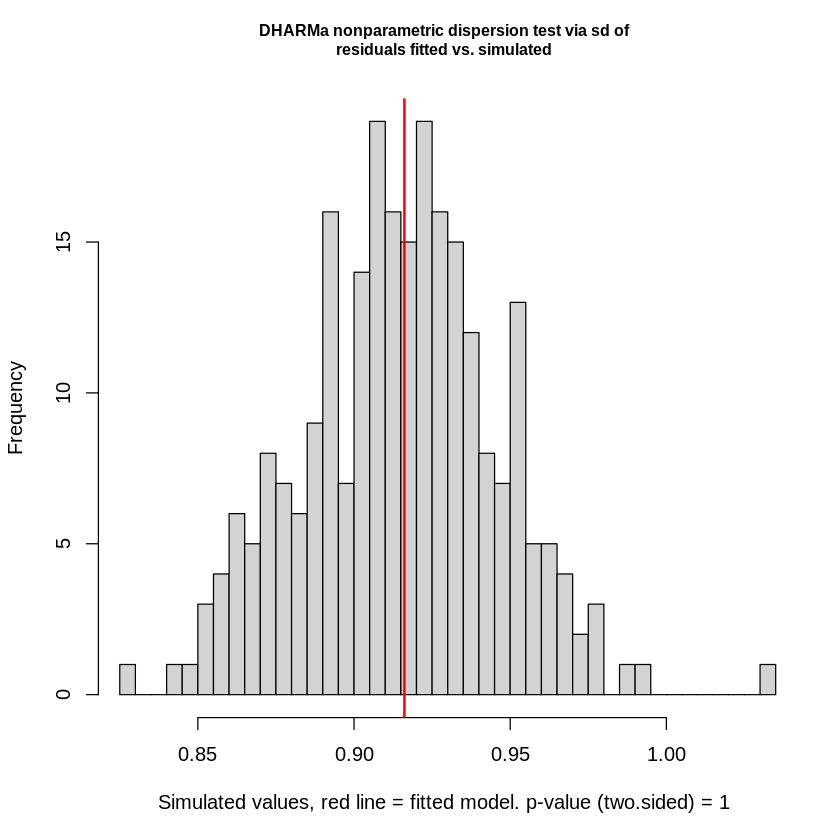


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = 1.0004, p-value = 1
alternative hypothesis: two.sided


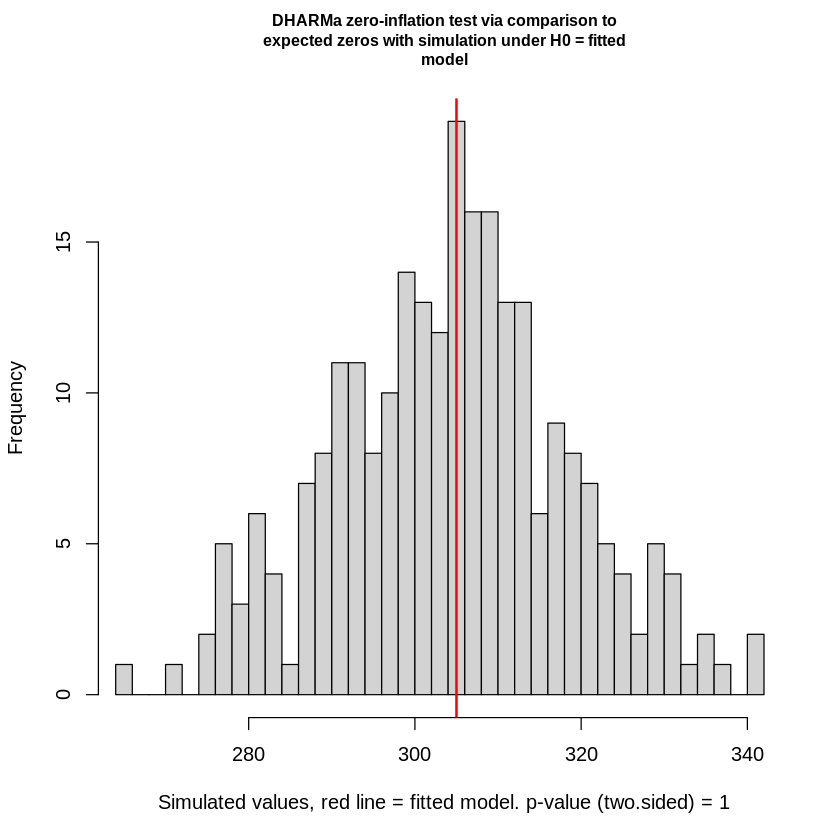

In [76]:
# Then, run assumption tests:
# check whether residuals are uniformly distributed
testUniformity(sim_res_LMM_Model_1)

# check whether the model assumes the correct amount of variation
testDispersion(sim_res_LMM_Model_1)

# check whether the model is predicting too many or too few zeros
testZeroInflation(sim_res_LMM_Model_1)

The uniformity, dispersion, and zero-inflation tests are all P>0.05, so residuals are uniformly distributed, assumes the correct amount of variation (i.e., no overdispersion), and the model is not predicting too many or too few zeros.

#### LLM Model 2

In [77]:
# Fit logistic mixed-effects models
LMM_Model_2 <- glmer(Correct_answer ~ ChatbotID + TestDay + ExamDomain + (1 + TestDay | ChatbotID),
               data = Experiment2_forLMM,
               family = binomial)

# Summary of the models and model parameters
cat("\n\n LMM_Model_2 \n")
summary(LMM_Model_2)
model_parameters(LMM_Model_2)

boundary (singular) fit: see help('isSingular')





 LMM_Model_2 


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Correct_answer ~ ChatbotID + TestDay + ExamDomain + (1 + TestDay |  
    ChatbotID)
   Data: Experiment2_forLMM

      AIC       BIC    logLik -2*log(L)  df.resid 
   1342.7    1405.0    -659.4    1318.7      1320 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6305  0.2754  0.4306  0.5340  0.9945 

Random effects:
 Groups    Name         Variance  Std.Dev.  Corr
 ChatbotID (Intercept)  0.000e+00 0.000e+00     
           TestDayTest2 1.389e-21 3.727e-11  NaN
Number of obs: 1332, groups:  ChatbotID, 6

Fixed effects:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)        1.33857    0.18011   7.432 1.07e-13 ***
ChatbotIDChatbotB  0.43024    0.22633   1.901 0.057306 .  
ChatbotIDChatbotC -0.15768    0.21239  -0.742 0.457860    
ChatbotIDChatbotD  0.04673    0.21619   0.216 0.828863    
ChatbotIDChatbotE  0.94692    0.2

Parameter,Coefficient,SE,CI,CI_low,CI_high,z,df_error,p,Effects,Group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
(Intercept),1.338565e+00,0.1801140,0.95,0.98554827,1.6915823,7.4317658,Inf,1.071574e-13,fixed,
ChatbotIDChatbotB,4.302431e-01,0.2263286,0.95,-0.01335276,0.8738390,1.9009668,Inf,5.730636e-02,fixed,
ChatbotIDChatbotC,-1.576765e-01,0.2123945,0.95,-0.57396209,0.2586092,-0.7423753,Inf,4.578600e-01,fixed,
ChatbotIDChatbotD,4.673076e-02,0.2161858,0.95,-0.37698553,0.4704470,0.2161602,Inf,8.288629e-01,fixed,
ChatbotIDChatbotE,9.469190e-01,0.2475637,0.95,0.46170298,1.4321349,3.8249504,Inf,1.307984e-04,fixed,
ChatbotIDChatbotF,1.240191e+00,0.2644343,0.95,0.72190908,1.7584724,4.6899773,Inf,2.732354e-06,fixed,
TestDayTest2,-8.384489e-02,0.1365356,0.95,-0.35144982,0.1837600,-0.6140879,Inf,5.391572e-01,fixed,
ExamDomainB,-1.086090e+00,0.1403856,0.95,-1.36124074,-0.8109395,-7.7364806,Inf,1.022066e-14,fixed,
ExamDomainC,1.686196e-01,0.3305293,0.95,-0.47920598,0.8164451,0.5101501,Inf,6.099463e-01,fixed,


##### Check assumptions

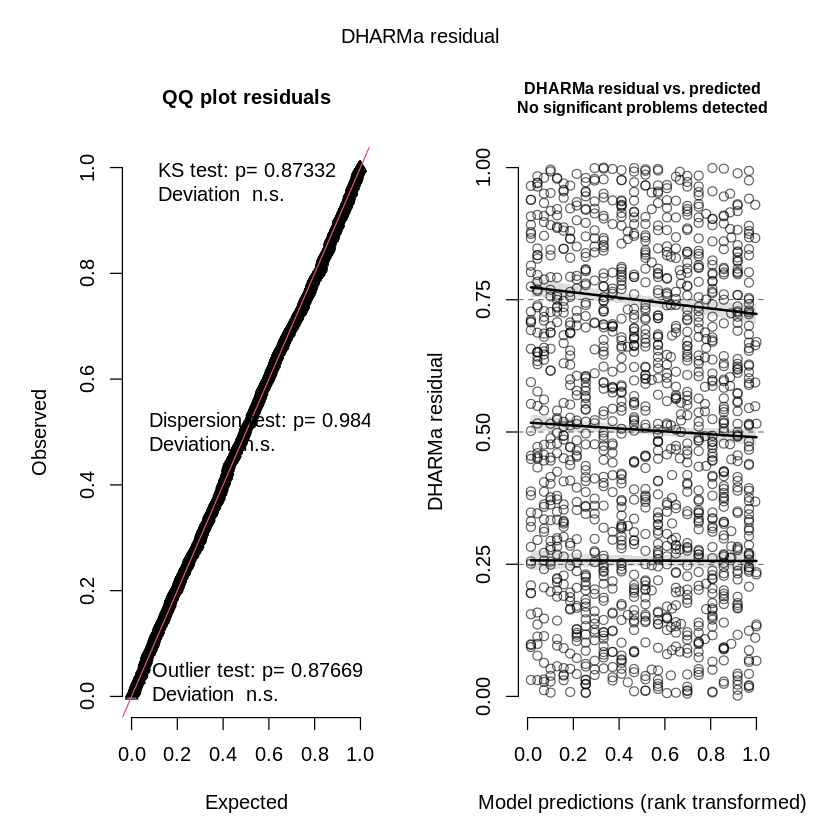

In [78]:
# Check assumptions in mixed model by inspecting the residual diagnostics using the DHARMa package
# simulate residuals
sim_res_LMM_Model_2 <- simulateResiduals(fittedModel = LMM_Model_2, plot = TRUE)

<p>QQ plot is a straight line (no curved or stepped line) so residuals are ok.
<p>The residuals vs predicted plot is a random scatter (no peaks or skew) so residuals are ok.


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  simulationOutput$scaledResiduals
D = 0.01625, p-value = 0.8733
alternative hypothesis: two-sided


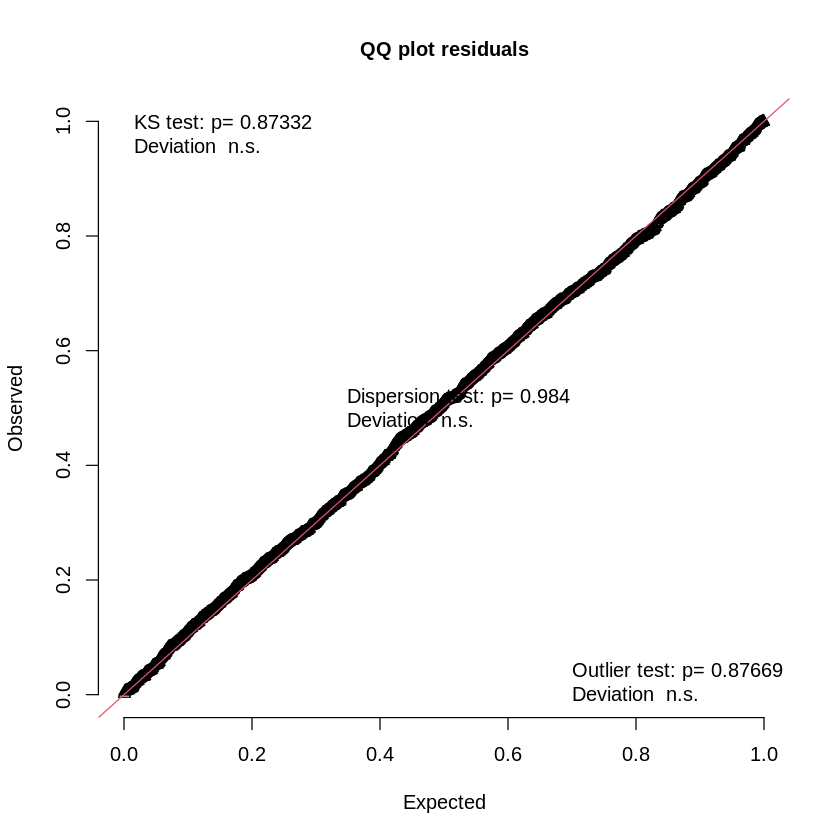


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 0.99996, p-value = 0.984
alternative hypothesis: two.sided


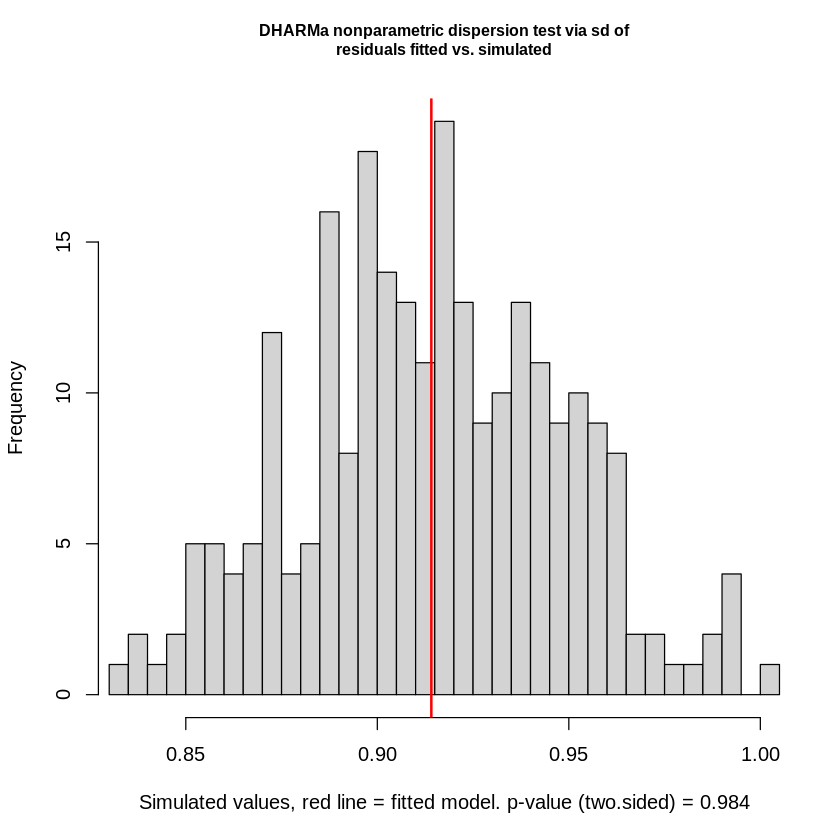


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = 0.99729, p-value = 0.968
alternative hypothesis: two.sided


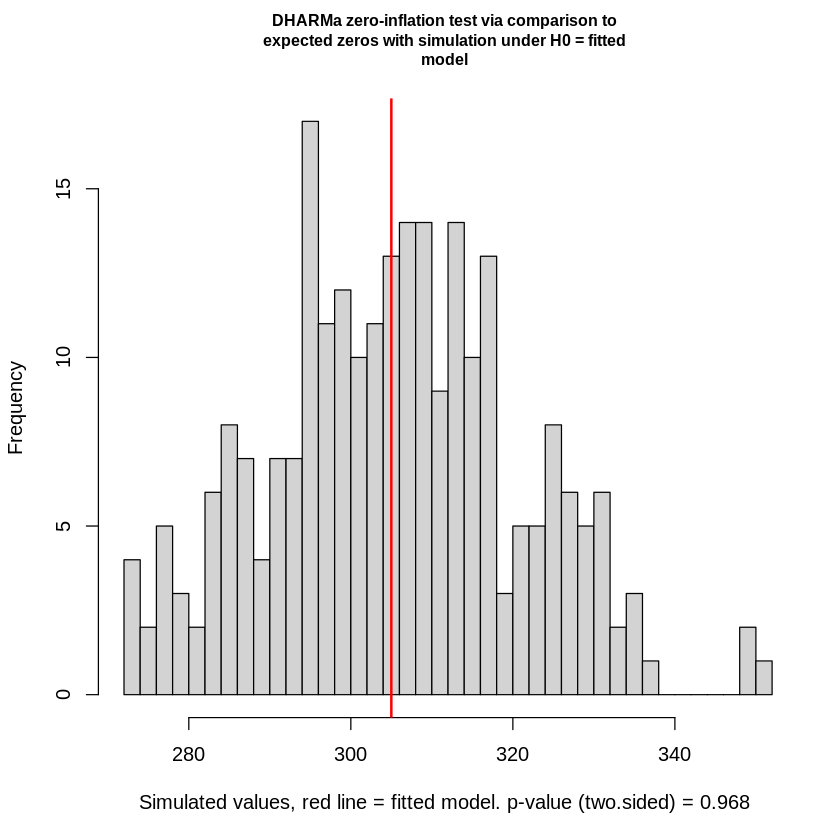

In [79]:
# Then, run assumption tests:
# check whether residuals are uniformly distributed
testUniformity(sim_res_LMM_Model_2)

# check whether the model assumes the correct amount of variation
testDispersion(sim_res_LMM_Model_2)

# check whether the model is predicting too many or too few zeros
testZeroInflation(sim_res_LMM_Model_2)

The uniformity, dispersion, and zero-inflation tests are all P>0.05, so residuals are uniformly distributed, assumes the correct amount of variation (i.e., no overdispersion), and the model is not predicting too many or too few zeros.

#### Posthoc and effect sizes

In [80]:
# Examine posthoc multiple comparisons.
# Install and load emmeans package
install.packages("emmeans")
library(emmeans)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘mvtnorm’


Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'



In [81]:
# Pairwise comparisons LMM_Model_1
# Run pairwise comparisons for ChatbotID at each Day
posthoc_LMM_Model_1_ChatbotID <- emmeans(LMM_Model_1, pairwise ~ ChatbotID)
# print results
cat("\n\n Pairwise comparisons for ChatbotID for LMM_Model_1 \n")
summary(posthoc_LMM_Model_1_ChatbotID)

# Run pairwise comparisons for TestDay at each Day
posthoc_LMM_Model_1_TestDay <- emmeans(LMM_Model_1, pairwise ~ TestDay)
# print results
cat("\n\n Pairwise comparisons for TestDay for LMM_Model_1 \n")
summary(posthoc_LMM_Model_1_TestDay)

# Run pairwise comparisons for ExamDomain at each Day
posthoc_LMM_Model_1_ExamDomain <- emmeans(LMM_Model_1, pairwise ~ ExamDomain)
# print results
cat("\n\n Pairwise comparisons for ExamDomain for LMM_Model_1 \n")
summary(posthoc_LMM_Model_1_ExamDomain)



 Pairwise comparisons for ChatbotID for LMM_Model_1 


,ChatbotID,emmean,SE,df,asymp.LCL,asymp.UCL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ChatbotA,0.9908193,0.1778363,Inf,0.6422667,1.339372
2,ChatbotB,1.4210625,0.1917260,Inf,1.0452864,1.796839
3,ChatbotC,0.8331429,0.1741174,Inf,0.4918791,1.174407
4,ChatbotD,1.0375501,0.1790732,Inf,0.6865730,1.388527
5,ChatbotE,1.9377383,0.2168610,Inf,1.5126986,2.362778
6,ChatbotF,2.2310101,0.2361240,Inf,1.7682155,2.693805
,contrast,estimate,SE,df,z.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ChatbotA - ChatbotB,-0.43024313,0.2263299,Inf,-1.9009560,4.014438e-01




 Pairwise comparisons for TestDay for LMM_Model_1 


,TestDay,emmean,SE,df,asymp.LCL,asymp.UCL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Test1,1.450476,0.1363650,Inf,1.183206,1.717747
2,Test2,1.366631,0.1347319,Inf,1.102562,1.630701
,contrast,estimate,SE,df,z.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Test1 - Test2,0.08384489,0.136536,Inf,0.6140864,0.5391583




 Pairwise comparisons for ExamDomain for LMM_Model_1 


,ExamDomain,emmean,SE,df,asymp.LCL,asymp.UCL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,1.7143774,0.1004651,Inf,1.5174695,1.911285
2,B,0.6282873,0.1013206,Inf,0.4297025,0.826872
3,C,1.8829969,0.3169311,Inf,1.2618233,2.504171
,contrast,estimate,SE,df,z.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A - B,1.0860901,0.1403864,Inf,7.736433,4.873879e-14
2,A - C,-0.1686196,0.3305307,Inf,-0.510148,8.664029e-01
3,B - C,-1.2547097,0.3317118,Inf,-3.782529,4.558251e-04


In [82]:
# Pairwise comparisons LMM_Model_2
# Run pairwise comparisons for ChatbotID at each Day
posthoc_LMM_Model_2_ChatbotID <- emmeans(LMM_Model_2, pairwise ~ ChatbotID)
# print results
cat("\n\n Pairwise comparisons for ChatbotID for LMM_Model_2 \n")
summary(posthoc_LMM_Model_2_ChatbotID)

# Run pairwise comparisons for TestDay at each Day
posthoc_LMM_Model_2_TestDay <- emmeans(LMM_Model_2, pairwise ~ TestDay)
# print results
cat("\n\n Pairwise comparisons for TestDay for LMM_Model_2 \n")
summary(posthoc_LMM_Model_2_TestDay)

# Run pairwise comparisons for ExamDomain at each Day
posthoc_LMM_Model_2_ExamDomain <- emmeans(LMM_Model_2, pairwise ~ ExamDomain)
# print results
cat("\n\n Pairwise comparisons for ExamDomain for LMM_Model_2 \n")
summary(posthoc_LMM_Model_2_ExamDomain)



 Pairwise comparisons for ChatbotID for LMM_Model_2 


,ChatbotID,emmean,SE,df,asymp.LCL,asymp.UCL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ChatbotA,0.9908193,0.1778347,Inf,0.6422697,1.339369
2,ChatbotB,1.4210625,0.1917256,Inf,1.0452871,1.796838
3,ChatbotC,0.8331429,0.1741170,Inf,0.4918798,1.174406
4,ChatbotD,1.0375501,0.1790729,Inf,0.6865737,1.388526
5,ChatbotE,1.9377383,0.2168616,Inf,1.5126973,2.362779
6,ChatbotF,2.2310101,0.2361211,Inf,1.7682212,2.693799
,contrast,estimate,SE,df,z.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ChatbotA - ChatbotB,-0.43024313,0.2263286,Inf,-1.9009668,4.014372e-01




 Pairwise comparisons for TestDay for LMM_Model_2 


,TestDay,emmean,SE,df,asymp.LCL,asymp.UCL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Test1,1.450476,0.1363645,Inf,1.183207,1.717746
2,Test2,1.366631,0.1347316,Inf,1.102562,1.630701
,contrast,estimate,SE,df,z.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Test1 - Test2,0.08384489,0.1365356,Inf,0.6140879,0.5391572




 Pairwise comparisons for ExamDomain for LMM_Model_2 


,ExamDomain,emmean,SE,df,asymp.LCL,asymp.UCL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,1.7143774,0.1004646,Inf,1.5174703,1.9112844
2,B,0.6282873,0.1013203,Inf,0.4297032,0.8268713
3,C,1.8829969,0.3169301,Inf,1.2618254,2.5041684
,contrast,estimate,SE,df,z.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A - B,1.0860901,0.1403856,Inf,7.7364806,4.862777e-14
2,A - C,-0.1686196,0.3305293,Inf,-0.5101501,8.664019e-01
3,B - C,-1.2547097,0.3317107,Inf,-3.7825422,4.558017e-04


#### Statistical power

In [83]:
# Define alpha level for a two-sided test
alpha <- 0.05

# Critical z-value for alpha level
z_alpha <- qnorm(1 - alpha / 2)

# Define function to calculate power from z-ratio
calculate_power <- function(z_ratio, z_alpha) {
  power <- 1 - pnorm(z_alpha - abs(z_ratio)) + pnorm(-z_alpha - abs(z_ratio))
  return(power)
}

# Define function to calculate effect size r from z.ratio
calculate_r <- function(z) {
  r <- z / sqrt(z^2 + 1)
  return(r)
}

# Define function to calculate the standard error of r
calculate_SE_r <- function(N) {
  SE_r <- 1 / sqrt(N - 3)
  return(SE_r)
}

# Define function to calculate 95% CI for r using Fisher's Z-transformation
calculate_CI_r <- function(r, N) {
  Z_r <- 0.5 * log((1 + r) / (1 - r))  # Fisher's Z-transformation
  SE_Z <- 1 / sqrt(N - 3)
  Z_CI_lower <- Z_r - 1.96 * SE_Z
  Z_CI_upper <- Z_r + 1.96 * SE_Z
  r_CI_lower <- (exp(2 * Z_CI_lower) - 1) / (exp(2 * Z_CI_lower) + 1)
  r_CI_upper <- (exp(2 * Z_CI_upper) - 1) / (exp(2 * Z_CI_upper) + 1)
  return(c(r_CI_lower, r_CI_upper))
}

In [84]:
# LMM_Model_1 ChatbotID
# Extract the contrasts table from the pairwise comparison results
contrasts_table_LMM_Model_1_ChatbotID <- as.data.frame(posthoc_LMM_Model_1_ChatbotID$contrasts)
# Add r, SE, and 95%CI columns to contrasts table
contrasts_table_LMM_Model_1_ChatbotID$r <- mapply(calculate_r, contrasts_table_LMM_Model_1_ChatbotID$z.ratio)
N <- 6  # number of chatbots
contrasts_table_LMM_Model_1_ChatbotID$SE_r <- calculate_SE_r(N)
# Apply CI calculation
CI_values <- t(mapply(calculate_CI_r, contrasts_table_LMM_Model_1_ChatbotID$r, MoreArgs = list(N = N)))
contrasts_table_LMM_Model_1_ChatbotID$r_CI_lower <- CI_values[, 1]
contrasts_table_LMM_Model_1_ChatbotID$r_CI_upper <- CI_values[, 2]
# Add power calculation to the contrasts table
contrasts_table_LMM_Model_1_ChatbotID$Power <- mapply(calculate_power, contrasts_table_LMM_Model_1_ChatbotID$z.ratio, MoreArgs = list(z_alpha = z_alpha))
# Display the results
cat("\n\nContrasts table for ChatbotID for LMM_Model_1\n")
print(contrasts_table_LMM_Model_1_ChatbotID)

# LMM_Model_1 TestDay
# Extract the contrasts table from the pairwise comparison results
contrasts_table_LMM_Model_1_TestDay <- as.data.frame(posthoc_LMM_Model_1_TestDay$contrasts)
# Add r, SE, and 95%CI columns to contrasts table
contrasts_table_LMM_Model_1_TestDay$r <- mapply(calculate_r, contrasts_table_LMM_Model_1_TestDay$z.ratio)
N <- 2 * 6  # number of test days x number of chatbots
contrasts_table_LMM_Model_1_TestDay$SE_r <- calculate_SE_r(N)
# Apply CI calculation
CI_values <- t(mapply(calculate_CI_r, contrasts_table_LMM_Model_1_TestDay$r, MoreArgs = list(N = N)))
contrasts_table_LMM_Model_1_TestDay$r_CI_lower <- CI_values[, 1]
contrasts_table_LMM_Model_1_TestDay$r_CI_upper <- CI_values[, 2]
# Add power calculation to the contrasts table
contrasts_table_LMM_Model_1_TestDay$Power <- mapply(calculate_power, contrasts_table_LMM_Model_1_TestDay$z.ratio, MoreArgs = list(z_alpha = z_alpha))
# Display the results
cat("\n\nContrasts table for TestDay for LMM_Model_1\n")
print(contrasts_table_LMM_Model_1_TestDay)

# LMM_Model_1 ExamDomain
# Extract the contrasts table from the pairwise comparison results
contrasts_table_LMM_Model_1_ExamDomain <- as.data.frame(posthoc_LMM_Model_1_ExamDomain$contrasts)
# Add r, SE, and 95%CI columns to contrasts table
contrasts_table_LMM_Model_1_ExamDomain$r <- mapply(calculate_r, contrasts_table_LMM_Model_1_ExamDomain$z.ratio)
N <- 3 * 6  # number of domains x number of chatbots
contrasts_table_LMM_Model_1_ExamDomain$SE_r <- calculate_SE_r(N)
# Apply CI calculation
CI_values <- t(mapply(calculate_CI_r, contrasts_table_LMM_Model_1_ExamDomain$r, MoreArgs = list(N = N)))
contrasts_table_LMM_Model_1_ExamDomain$r_CI_lower <- CI_values[, 1]
contrasts_table_LMM_Model_1_ExamDomain$r_CI_upper <- CI_values[, 2]
# Add power calculation to the contrasts table
contrasts_table_LMM_Model_1_ExamDomain$Power <- mapply(calculate_power, contrasts_table_LMM_Model_1_ExamDomain$z.ratio, MoreArgs = list(z_alpha = z_alpha))
# Display the results
cat("\n\nContrasts table for ExamDomain for LMM_Model_1\n")
print(contrasts_table_LMM_Model_1_ExamDomain)



Contrasts table for ChatbotID for LMM_Model_1
 contrast              estimate        SE  df z.ratio p.value          r
 ChatbotA - ChatbotB -0.4302431 0.2263299 Inf  -1.901  0.4014 -0.8850147
 ChatbotA - ChatbotC  0.1576765 0.2123962 Inf   0.742  0.9766  0.5960716
 ChatbotA - ChatbotD -0.0467308 0.2161874 Inf  -0.216  0.9999 -0.2112790
 ChatbotA - ChatbotE -0.9469190 0.2475639 Inf  -3.825  0.0018 -0.9674820
 ChatbotA - ChatbotF -1.2401907 0.2644395 Inf  -4.690  <.0001 -0.9780145
 ChatbotB - ChatbotC  0.5879196 0.2237114 Inf   2.628  0.0906  0.9346241
 ChatbotB - ChatbotD  0.3835124 0.2272212 Inf   1.688  0.5398  0.8603362
 ChatbotB - ChatbotE -0.5166758 0.2569678 Inf  -2.011  0.3361 -0.8953749
 ChatbotB - ChatbotF -0.8099476 0.2732000 Inf  -2.965  0.0359 -0.9475480
 ChatbotC - ChatbotD -0.2044072 0.2133770 Inf  -0.958  0.9310 -0.6917659
 ChatbotC - ChatbotE -1.1045954 0.2452369 Inf  -4.504  0.0001 -0.9762299
 ChatbotC - ChatbotF -1.3978672 0.2622859 Inf  -5.330  <.0001 -0.9828485
 Ch

In [85]:
# Install and load pwr package
install.packages("pwr")
library(pwr)
install.packages("simr")
library(simr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘binom’, ‘plotrix’, ‘RLRsim’



Attaching package: ‘simr’


The following object is masked from ‘package:lme4’:

    getData


The following object is masked from ‘package:stringr’:

    fixed




In [86]:
# Perform power analysis by simulation (method "f" for ANOVA-like test)
sim_result_LMM_Model_1 <- powerSim(LMM_Model_1, test = fixed("ChatbotID", method = "f"), nsim = 10)
sim_result_LMM_Model_2 <- powerSim(LMM_Model_2, test = fixed("ChatbotID", method = "f"), nsim = 10)

# View the simulation results
cat("\n\n Power simulation for LMM_Model_1 \n")
sim_result_LMM_Model_1
cat("\n\n Power simulation for LMM_Model_2 \n")
sim_result_LMM_Model_2

Simulating: |                                                                  |

boundary (singular) fit: see help('isSingular')



Simulating: |======                                                            |

boundary (singular) fit: see help('isSingular')



Simulating: |=============                                                     |

boundary (singular) fit: see help('isSingular')



Simulating: |===================                                               |

boundary (singular) fit: see help('isSingular')



Simulating: |==========================                                        |

boundary (singular) fit: see help('isSingular')



Simulating: |=================================                                 |

boundary (singular) fit: see help('isSingular')



Simulating: |=======================================                           |

boundary (singular) fit: see help('isSingular')



Simulating: |==============================================                    |

boundary (singular) fit: see help('isSingular')



Simulating: |====================================================              |

boundary (singular) fit: see help('isSingular')



Simulating: |===========================================================       |

boundary (singular) fit: see help('isSingular')



Simulating: |==================================================================|

Warning message in observedPowerWarning(sim):
“This appears to be an "observed power" calculation”


Simulating: |                                                                  |

boundary (singular) fit: see help('isSingular')



Simulating: |======                                                            |

boundary (singular) fit: see help('isSingular')



Simulating: |=============                                                     |

boundary (singular) fit: see help('isSingular')



Simulating: |===================                                               |

boundary (singular) fit: see help('isSingular')



Simulating: |==========================                                        |

boundary (singular) fit: see help('isSingular')



Simulating: |=================================                                 |

boundary (singular) fit: see help('isSingular')



Simulating: |=======================================                           |

boundary (singular) fit: see help('isSingular')



Simulating: |==============================================                    |

boundary (singular) fit: see help('isSingular')



Simulating: |====================================================              |

boundary (singular) fit: see help('isSingular')



Simulating: |===========================================================       |

boundary (singular) fit: see help('isSingular')



Simulating: |==================================================================|

Warning message in observedPowerWarning(sim):
“This appears to be an "observed power" calculation”




 Power simulation for LMM_Model_1 


Power for predictor 'ChatbotID', (95% confidence interval):
       0.00% ( 0.00, 30.85)

Test: Type-II F-test (package car)

Based on 10 simulations, (10 warnings, 10 errors)
alpha = 0.05, nrow = 1332

Time elapsed: 0 h 0 m 8 s

nb: result might be an observed power calculation



 Power simulation for LMM_Model_2 


Power for predictor 'ChatbotID', (95% confidence interval):
       0.00% ( 0.00, 30.85)

Test: Type-II F-test (package car)

Based on 10 simulations, (10 warnings, 10 errors)
alpha = 0.05, nrow = 1332

Time elapsed: 0 h 0 m 12 s

nb: result might be an observed power calculation

### Generalized Linear Model (GLM) with a binomial distribution

In [87]:
# Refit logistic regression model without random effect, i.e. a standard logistic regression model instead of a mixed-effects model.
# Instead of a Logistic Mixed Model (LMM), set ChatbotID, TestDay, and ExamDomain as fixed effects with no random effects or random slopes (i.e. Generalized Linear Model (GLM) with a binomial distribution).
# i.e. by removing (1 | ChatbotID), you treat ChatbotID as a fixed effect only, which avoids singularity issues caused by zero variance in the random effects structure.
GLM_Model_1 <- glm(Correct_answer ~ ChatbotID * TestDay * ExamDomain,
                   data = Experiment2_forLMM,
                   family = binomial)

# Summary of the model
cat("\n\n GLM_Model_1 \n")
summary(GLM_Model_1)
model_parameters(GLM_Model_1)



 GLM_Model_1 



Call:
glm(formula = Correct_answer ~ ChatbotID * TestDay * ExamDomain, 
    family = binomial, data = Experiment2_forLMM)

Coefficients:
                                             Estimate Std. Error z value
(Intercept)                                 1.312e+00  3.011e-01   4.358
ChatbotIDChatbotB                           2.973e-01  4.469e-01   0.665
ChatbotIDChatbotC                          -1.437e-15  4.258e-01   0.000
ChatbotIDChatbotD                           2.973e-01  4.469e-01   0.665
ChatbotIDChatbotE                           9.904e-01  5.234e-01   1.892
ChatbotIDChatbotF                           9.904e-01  5.234e-01   1.892
TestDayTest2                                2.973e-01  4.469e-01   0.665
ExamDomainB                                -1.207e+00  4.430e-01  -2.724
ExamDomainC                                -3.959e-01  8.892e-01  -0.445
ChatbotIDChatbotB:TestDayTest2             -1.839e-01  6.532e-01  -0.282
ChatbotIDChatbotC:TestDayTest2             -9.837e-01  5.97

Parameter,Coefficient,SE,CI,CI_low,CI_high,z,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.312186e+00,0.3010969,0.95,7.509856e-01,1.9408304,4.358020e+00,Inf,1.312442e-05
ChatbotIDChatbotB,2.972515e-01,0.4469343,0.95,-5.760228e-01,1.1915493,6.650900e-01,Inf,5.059929e-01
ChatbotIDChatbotC,-1.437450e-15,0.4258153,0.95,-8.407104e-01,0.8407104,-3.375758e-15,Inf,1.000000e+00
ChatbotIDChatbotD,2.972515e-01,0.4469343,0.95,-5.760228e-01,1.1915493,6.650900e-01,Inf,5.059929e-01
ChatbotIDChatbotE,9.903987e-01,0.5234431,0.95,2.732815e-03,2.0878753,1.892085e+00,Inf,5.847969e-02
ChatbotIDChatbotF,9.903987e-01,0.5234431,0.95,2.732815e-03,2.0878753,1.892085e+00,Inf,5.847969e-02
TestDayTest2,2.972515e-01,0.4469343,0.95,-5.760228e-01,1.1915493,6.650900e-01,Inf,5.059929e-01
ExamDomainB,-1.206826e+00,0.4429615,0.95,-2.093013e+00,-0.3477471,-2.724449e+00,Inf,6.440895e-03
ExamDomainC,-3.958957e-01,0.8891903,0.95,-2.046943e+00,1.6183237,-4.452317e-01,Inf,6.561524e-01


In [88]:
# Use an ANOVA-like approach with a likelihood ratio test to evaluate the significance of predictors and interactions
anova(GLM_Model_1, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,1331,1433.338,NA
ChatbotID,5,49.1025690,1326,1384.235,2.114666e-09
TestDay,1,0.3569769,1325,1383.878,5.501900e-01
ExamDomain,2,65.1746159,1323,1318.704,7.039016e-15
ChatbotID:TestDay,5,5.0109231,1318,1313.693,4.145486e-01
ChatbotID:ExamDomain,10,12.3916311,1308,1301.301,2.597006e-01
TestDay:ExamDomain,2,0.2283985,1306,1301.073,8.920802e-01
ChatbotID:TestDay:ExamDomain,10,3.3595422,1296,1297.713,9.716537e-01


In [89]:
# assess the model's goodness-of-fit using pseudo R-squared metrics or diagnostic plots
# install packages
install.packages("MuMIn")
library(MuMIn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [90]:
# Pseudo R-squared
r.squaredGLMM(GLM_Model_1)

Warning message:
“the null model is only correct if all the variables it uses are identical 
to those used in fitting the original model.”


,R2m,R2c
theoretical,0.6640636,0.6640636
delta,0.5344800,0.5344800


##### Check assumptions

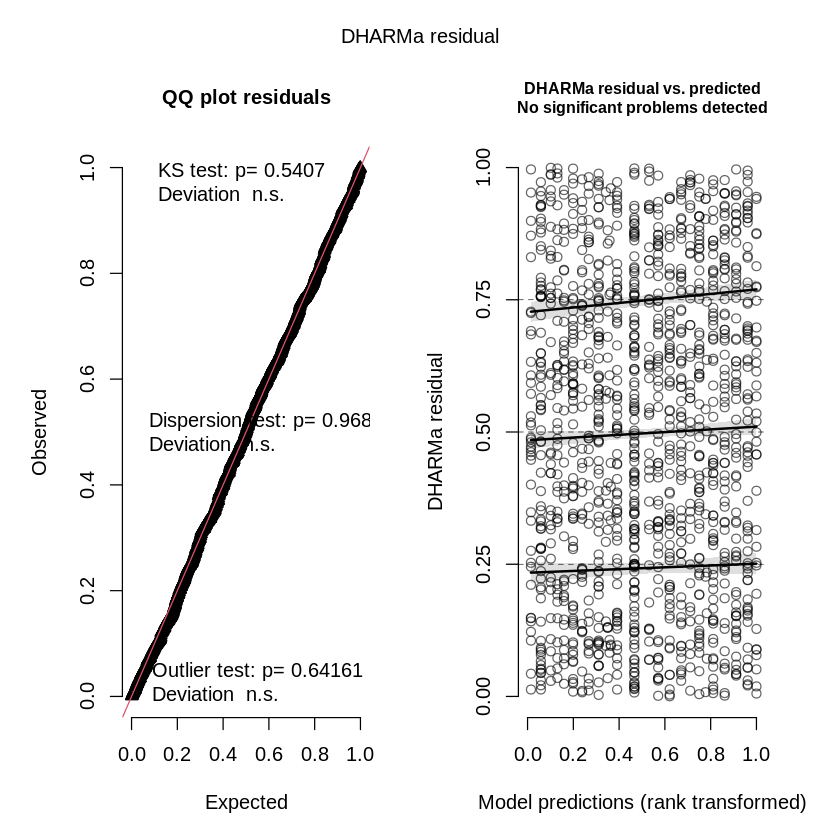

In [91]:
# Check assumptions in mixed model by inspecting the residual diagnostics using the DHARMa package

# simulate residuals
sim_res_GLM_Model_1 <- simulateResiduals(fittedModel = GLM_Model_1, plot = TRUE)

<p>QQ plot is a straight line (no curved or stepped line) so residuals are ok.
<p>The residuals vs predicted plot is a random scatter (no peaks or skew) so residuals are ok.


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  simulationOutput$scaledResiduals
D = 0.021978, p-value = 0.5407
alternative hypothesis: two-sided


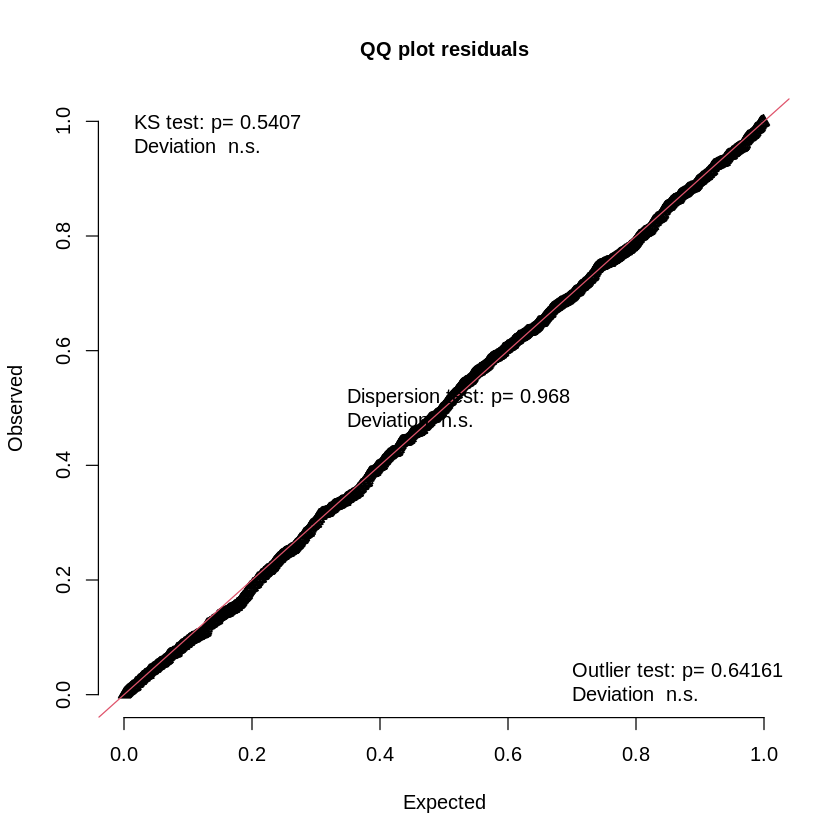


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 0.99899, p-value = 0.968
alternative hypothesis: two.sided


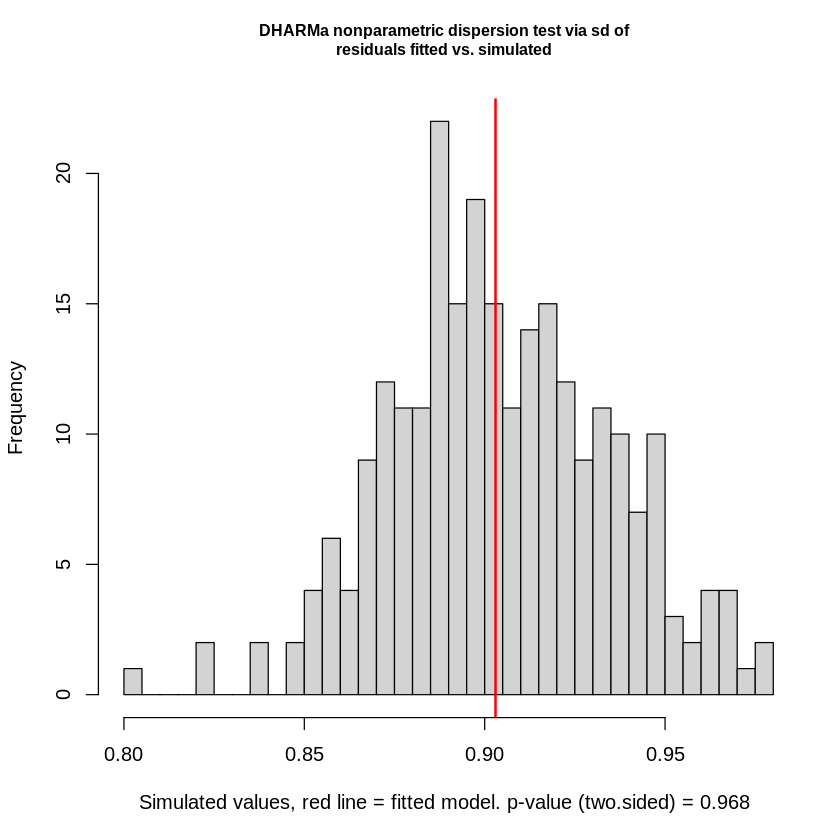


	DHARMa zero-inflation test via comparison to expected zeros with
	simulation under H0 = fitted model

data:  simulationOutput
ratioObsSim = 1.0001, p-value = 1
alternative hypothesis: two.sided


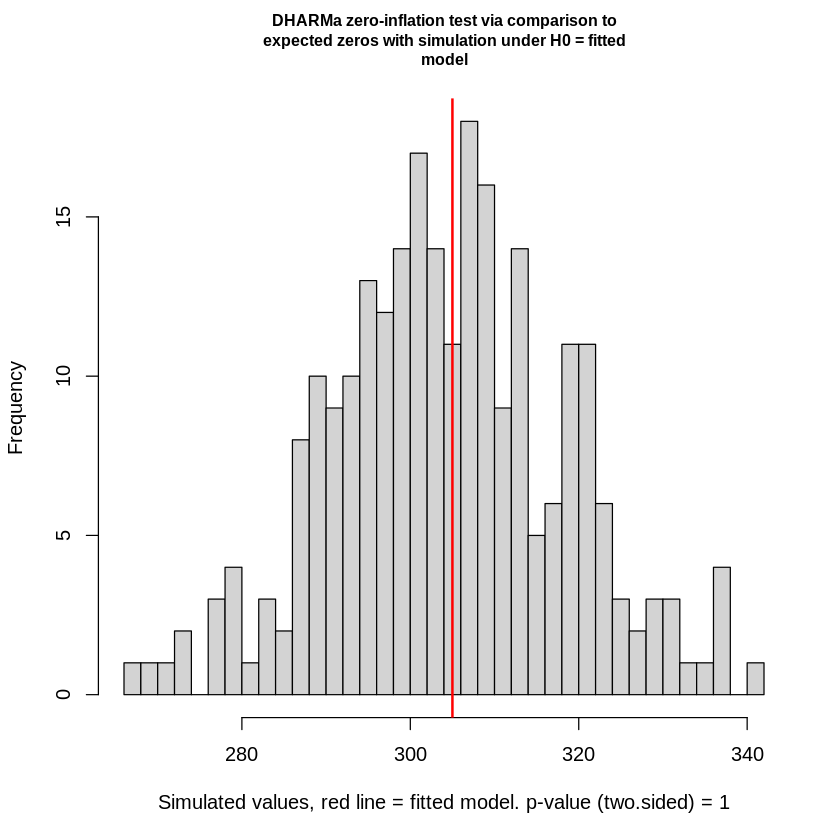

In [92]:
# Then, run assumption tests:
# check whether residuals are uniformly distributed
testUniformity(sim_res_GLM_Model_1)

# check whether the model assumes the correct amount of variation
testDispersion(sim_res_GLM_Model_1)

# check whether the model is predicting too many or too few zeros
testZeroInflation(sim_res_GLM_Model_1)

The uniformity, dispersion, and zero-inflation tests are all P>0.05, so residuals are uniformly distributed, assumes the correct amount of variation (i.e., no overdispersion), and the model is not predicting too many or too few zeros.

#### Posthoc test

In [93]:
# Run pairwise comparisons for ChatbotID at each Day
posthoc_GLM_Model_1 <- emmeans(GLM_Model_1, pairwise ~ ChatbotID)
posthoc_GLM_Model_1a <- emmeans(GLM_Model_1, pairwise ~ TestDay)
posthoc_GLM_Model_1b <- emmeans(GLM_Model_1, pairwise ~ ExamDomain)

# print results
cat("\n\n Pairwise comparisons for ChatbotID for GLM_Model_1 \n")
summary(posthoc_GLM_Model_1)
cat("\n\n Pairwise comparisons for TestDay for GLM_Model_1 \n")
summary(posthoc_GLM_Model_1a)
cat("\n\n Pairwise comparisons for ExamDomain for GLM_Model_1 \n")
summary(posthoc_GLM_Model_1b)

NOTE: Results may be misleading due to involvement in interactions

NOTE: Results may be misleading due to involvement in interactions

NOTE: Results may be misleading due to involvement in interactions





 Pairwise comparisons for ChatbotID for GLM_Model_1 


,ChatbotID,emmean,SE,df,asymp.LCL,asymp.UCL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ChatbotA,0.8274878,0.2242804,Inf,0.3879063,1.267069
2,ChatbotB,3.8359030,151.1572592,Inf,-292.4268810,300.098687
3,ChatbotC,0.7549601,0.2223531,Inf,0.3191561,1.190764
4,ChatbotD,0.9910574,0.2515737,Inf,0.4979820,1.484133
5,ChatbotE,6.6619075,213.7684797,Inf,-412.3166138,425.640429
6,ChatbotF,6.8165601,213.7684820,Inf,-412.1619656,425.795086
,contrast,estimate,SE,df,z.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ChatbotA - ChatbotB,-3.00841520,151.1574256,Inf,-0.0199025300,1.0000000




 Pairwise comparisons for TestDay for GLM_Model_1 


,TestDay,emmean,SE,df,asymp.LCL,asymp.UCL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Test1,3.757499,87.27067,Inf,-167.2899,174.8049
2,Test2,2.871793,71.25625,Inf,-136.7879,142.5315
,contrast,estimate,SE,df,z.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Test1 - Test2,0.8857052,112.666,Inf,0.007861337,0.9937276




 Pairwise comparisons for ExamDomain for GLM_Model_1 


,ExamDomain,emmean,SE,df,asymp.LCL,asymp.UCL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,1.7301617,0.1054083,Inf,1.5235653,1.9367582
2,B,0.6308333,0.1024899,Inf,0.4299567,0.8317099
3,C,7.5829429,168.9989056,Inf,-323.6488255,338.8147113
,contrast,estimate,SE,df,z.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A - B,1.099328,0.1470207,Inf,7.47736958,2.470246e-13
2,A - C,-5.852781,168.9989385,Inf,-0.03463206,9.993390e-01
3,B - C,-6.952110,168.9989367,Inf,-0.04113700,9.990675e-01


In [94]:
# Get estimated marginal means for ChatbotID
GLMmodel_emmeans_ChatbotID <- emmeans(GLM_Model_1, ~ ChatbotID)
cat("\n\n Pairwise comparisons for ChatbotID \n")
pairs(GLMmodel_emmeans_ChatbotID, adjust = "bonferroni")

# Get estimated marginal means for TestDay
GLMmodel_emmeans_TestDay <- emmeans(GLM_Model_1, ~ TestDay)
cat("\n\n Pairwise comparisons for TestDay \n")
pairs(GLMmodel_emmeans_TestDay, adjust = "bonferroni")

# Get estimated marginal means for ExamDomain
GLMmodel_emmeans_ExamDomain <- emmeans(GLM_Model_1, ~ ExamDomain)
cat("\n\n Pairwise comparisons for ExamDomain \n")
pairs(GLMmodel_emmeans_ExamDomain, adjust = "bonferroni")

NOTE: Results may be misleading due to involvement in interactions





 Pairwise comparisons for ChatbotID 


 contrast            estimate      SE  df z.ratio p.value
 ChatbotA - ChatbotB  -3.0084 151.000 Inf  -0.020  1.0000
 ChatbotA - ChatbotC   0.0725   0.316 Inf   0.230  1.0000
 ChatbotA - ChatbotD  -0.1636   0.337 Inf  -0.485  1.0000
 ChatbotA - ChatbotE  -5.8344 214.000 Inf  -0.027  1.0000
 ChatbotA - ChatbotF  -5.9891 214.000 Inf  -0.028  1.0000
 ChatbotB - ChatbotC   3.0809 151.000 Inf   0.020  1.0000
 ChatbotB - ChatbotD   2.8448 151.000 Inf   0.019  1.0000
 ChatbotB - ChatbotE  -2.8260 262.000 Inf  -0.011  1.0000
 ChatbotB - ChatbotF  -2.9807 262.000 Inf  -0.011  1.0000
 ChatbotC - ChatbotD  -0.2361   0.336 Inf  -0.703  1.0000
 ChatbotC - ChatbotE  -5.9069 214.000 Inf  -0.028  1.0000
 ChatbotC - ChatbotF  -6.0616 214.000 Inf  -0.028  1.0000
 ChatbotD - ChatbotE  -5.6708 214.000 Inf  -0.027  1.0000
 ChatbotD - ChatbotF  -5.8255 214.000 Inf  -0.027  1.0000
 ChatbotE - ChatbotF  -0.1547 302.000 Inf  -0.001  1.0000

Results are averaged over the levels of: TestDay, ExamDomain 
Results a

NOTE: Results may be misleading due to involvement in interactions





 Pairwise comparisons for TestDay 


 contrast      estimate  SE  df z.ratio p.value
 Test1 - Test2    0.886 113 Inf   0.008  0.9937

Results are averaged over the levels of: ChatbotID, ExamDomain 
Results are given on the log odds ratio (not the response) scale. 

NOTE: Results may be misleading due to involvement in interactions





 Pairwise comparisons for ExamDomain 


 contrast estimate      SE  df z.ratio p.value
 A - B        1.10   0.147 Inf   7.477  <.0001
 A - C       -5.85 169.000 Inf  -0.035  1.0000
 B - C       -6.95 169.000 Inf  -0.041  1.0000

Results are averaged over the levels of: ChatbotID, TestDay 
Results are given on the log odds ratio (not the response) scale. 
P value adjustment: bonferroni method for 3 tests 

#### Statistical power

In [95]:
# Calculate power
effect_size <- 0.15 # Assume a medium effect size (f2 = 0.15) as a starting point
alpha <- 0.05
sample_size <- nrow(Experiment2_forLMM)
num_predictors <- length(coef(GLM_Model_1)) - 1 # Exclude Intercept

# Calculate power
power_GLM_Model_1 <- pwr.f2.test(u = num_predictors,
                            v = sample_size - num_predictors - 1,
                            f2 = effect_size,
                            sig.level = alpha)

# Print result
print(power_GLM_Model_1)


     Multiple regression power calculation 

              u = 35
              v = 1296
             f2 = 0.15
      sig.level = 0.05
          power = 1



### ANOVA

In [96]:
# Repeated measures ANOVA
anova_model <- aov(Correct_answer ~ ChatbotID * TestDay * ExamDomain, data = Experiment2_forLMM)
cat("ANOVA model")
summary(anova_model)

ANOVA model

                               Df Sum Sq Mean Sq F value   Pr(>F)    
ChatbotID                       5   8.23   1.646  10.053 1.86e-09 ***
TestDay                         1   0.06   0.061   0.371    0.542    
ExamDomain                      2  11.48   5.740  35.060 1.48e-15 ***
ChatbotID:TestDay               5   1.00   0.200   1.219    0.298    
ChatbotID:ExamDomain           10   1.79   0.179   1.091    0.366    
TestDay:ExamDomain              2   0.03   0.017   0.105    0.900    
ChatbotID:TestDay:ExamDomain   10   0.40   0.040   0.246    0.991    
Residuals                    1296 212.17   0.164                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

##### Check assumptions

[1] 226 658

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
     rstudent unadjusted p-value Bonferroni p
226 -2.343551           0.019252           NA

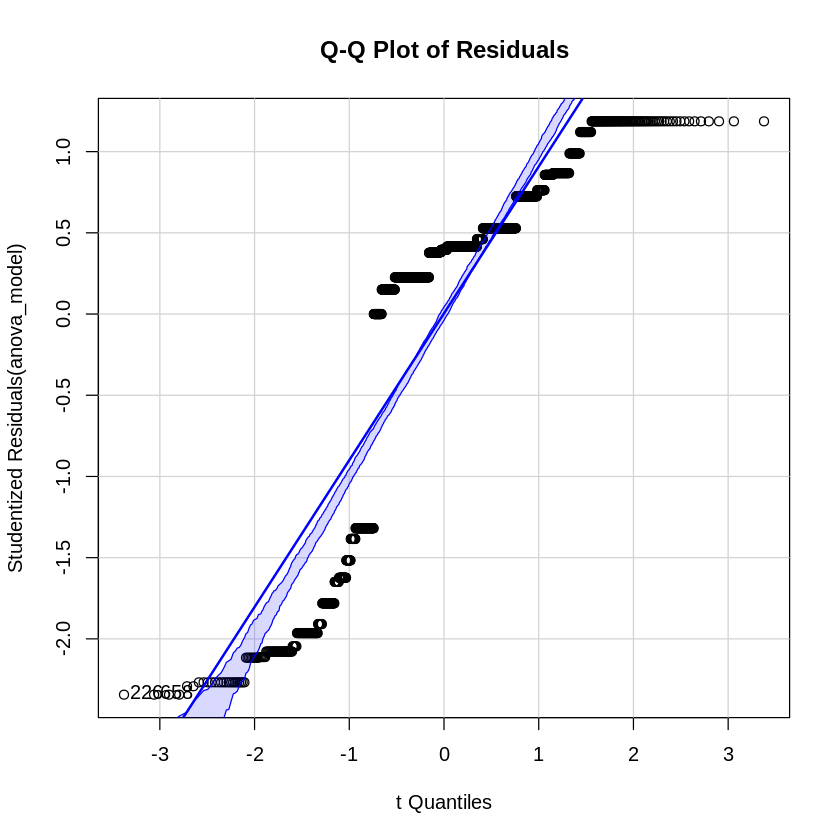

In [97]:
# check for normality of resisuals
qqPlot(anova_model, main="Q-Q Plot of Residuals", id.n=3)

# check for outliers
outlierTest(anova_model)

<p>QQ plot is curved and stepped line (not a straight line) so residuals are not ok and this model is not adequate.

#### Posthoc tests

In [98]:
# Install and load package
# install.packages("emmeans") already installed above
# library(emmeans)
install.packages("effectsize")
library(effectsize)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘performance’




In [99]:
# Pairwise comparisons for ChatbotID (Bonferroni-adjusted pairwise t-tests will be used to control the family-wise error rate for multiple comparisons).
posthoc_anova_model_ChatbotID <- emmeans(anova_model, pairwise ~ ChatbotID)
cat("\n\n Pairwise comparisons for ChatbotID \n")
print(posthoc_anova_model_ChatbotID)

NOTE: Results may be misleading due to involvement in interactions





 Pairwise comparisons for ChatbotID 
$emmeans
 ChatbotID emmean     SE   df lower.CL upper.CL
 ChatbotA   0.684 0.0409 1296    0.603    0.764
 ChatbotB   0.809 0.0409 1296    0.729    0.889
 ChatbotC   0.675 0.0409 1296    0.595    0.756
 ChatbotD   0.712 0.0409 1296    0.632    0.792
 ChatbotE   0.878 0.0409 1296    0.798    0.959
 ChatbotF   0.913 0.0409 1296    0.832    0.993

Results are averaged over the levels of: TestDay, ExamDomain 
Confidence level used: 0.95 

$contrasts
 contrast            estimate     SE   df t.ratio p.value
 ChatbotA - ChatbotB -0.12539 0.0579 1296  -2.165  0.2548
 ChatbotA - ChatbotC  0.00837 0.0579 1296   0.145  1.0000
 ChatbotA - ChatbotD -0.02820 0.0579 1296  -0.487  0.9966
 ChatbotA - ChatbotE -0.19452 0.0579 1296  -3.359  0.0104
 ChatbotA - ChatbotF -0.22894 0.0579 1296  -3.954  0.0011
 ChatbotB - ChatbotC  0.13376 0.0579 1296   2.310  0.1906
 ChatbotB - ChatbotD  0.09719 0.0579 1296   1.679  0.5463
 ChatbotB - ChatbotE -0.06913 0.0579 1296  -1.19

In [100]:
# Pairwise comparisons for ExamDomain (Bonferroni-adjusted pairwise t-tests will be used to control the family-wise error rate for multiple comparisons).
posthoc_anova_model_ExamDomain <- emmeans(anova_model, pairwise ~ ExamDomain)
cat("\n\n Pairwise comparisons for ExamDomain \n")
print(posthoc_anova_model_ExamDomain)

NOTE: Results may be misleading due to involvement in interactions





 Pairwise comparisons for ExamDomain 
$emmeans
 ExamDomain emmean     SE   df lower.CL upper.CL
 A           0.836 0.0144 1296    0.808    0.864
 B           0.643 0.0189 1296    0.605    0.680
 C           0.857 0.0441 1296    0.771    0.944

Results are averaged over the levels of: ChatbotID, TestDay 
Confidence level used: 0.95 

$contrasts
 contrast estimate     SE   df t.ratio p.value
 A - B      0.1933 0.0238 1296   8.128  <.0001
 A - C     -0.0213 0.0464 1296  -0.458  0.8907
 B - C     -0.2146 0.0480 1296  -4.467  <.0001

Results are averaged over the levels of: ChatbotID, TestDay 
P value adjustment: tukey method for comparing a family of 3 estimates 



#### Effect sizes and Statistical power

##### Effect for overall ANOVA model

In [101]:
# Compute partial eta-squared
eta_squared_results_anova_model <- eta_squared(anova_model)
# View the results
cat("\n\n Partial eta-squared for overall ANOVA\n")
print(eta_squared_results_anova_model)



 Partial eta-squared for overall ANOVA
# Effect Size for ANOVA (Type I)

Parameter                    | Eta2 (partial) |       95% CI
------------------------------------------------------------
ChatbotID                    |           0.04 | [0.02, 1.00]
TestDay                      |       2.87e-04 | [0.00, 1.00]
ExamDomain                   |           0.05 | [0.03, 1.00]
ChatbotID:TestDay            |       4.68e-03 | [0.00, 1.00]
ChatbotID:ExamDomain         |       8.35e-03 | [0.00, 1.00]
TestDay:ExamDomain           |       1.62e-04 | [0.00, 1.00]
ChatbotID:TestDay:ExamDomain |       1.90e-03 | [0.00, 1.00]

- One-sided CIs: upper bound fixed at [1.00].

##### Effect sizes and power for each ChatbotID contrast

In [102]:
# Calcuate odds for each chatbot as odds = probability of correct / 1 - prob of incorrect
# extract emmeans
emmeans_table_ChatbotID <- as.data.frame(posthoc_anova_model_ChatbotID$emmeans)

# add odds columns
emmeans_table_ChatbotID$odds <- emmeans_table_ChatbotID$emmean / (1 - emmeans_table_ChatbotID$emmean)

# add variance of log odds column (will help calculate SE of odds ratio later)
emmeans_table_ChatbotID$var_log_odds <- (emmeans_table_ChatbotID$SE /
                                         (emmeans_table_ChatbotID$emmean *
                                          (1 - emmeans_table_ChatbotID$emmean)))^2

# print table
print(emmeans_table_ChatbotID)

 ChatbotID    emmean         SE   df  lower.CL  upper.CL      odds var_log_odds
 ChatbotA  0.6837359 0.04094447 1296 0.6034112 0.7640606  2.161914   0.03585204
 ChatbotB  0.8091251 0.04094447 1296 0.7288004 0.8894498  4.239033   0.07028481
 ChatbotC  0.6753626 0.04094447 1296 0.5950379 0.7556874  2.080360   0.03487542
 ChatbotD  0.7119313 0.04094447 1296 0.6316066 0.7922560  2.471395   0.03985862
 ChatbotE  0.8782562 0.04094447 1296 0.7979315 0.9585809  7.213974   0.14664074
 ChatbotF  0.9126794 0.04094447 1296 0.8323547 0.9930041 10.452055   0.26394949

Results are averaged over the levels of: TestDay, ExamDomain 
Confidence level used: 0.95 


In [103]:
# Now calculate the odds ratio for each pairwise contrast
# Create all pairwise combinations of ChatbotID
contrast_pairs_ChatbotID <- combn(emmeans_table_ChatbotID$ChatbotID, 2, simplify = FALSE)

# Calculate odds ratios for each contrast
contrast_results_ChatbotID <- lapply(contrast_pairs_ChatbotID, function(pair) {
  odds1 <- emmeans_table_ChatbotID$odds[emmeans_table_ChatbotID$ChatbotID == pair[1]]
  odds2 <- emmeans_table_ChatbotID$odds[emmeans_table_ChatbotID$ChatbotID == pair[2]]
  odds_ratio <- odds1 / odds2
  var_log_odds1 <- emmeans_table_ChatbotID$var_log_odds[emmeans_table_ChatbotID$ChatbotID == pair[1]]
  var_log_odds2 <- emmeans_table_ChatbotID$var_log_odds[emmeans_table_ChatbotID$ChatbotID == pair[2]]
  se_log_odds_ratio <- sqrt(var_log_odds1 + var_log_odds2)
  se_odds_ratio <- odds_ratio * se_log_odds_ratio
  # Calculate confidence interval in the log scale
  log_odds_ratio <- log(odds_ratio)
  lower_log <- log_odds_ratio - 1.96 * se_log_odds_ratio
  upper_log <- log_odds_ratio + 1.96 * se_log_odds_ratio
  # Transform back to the odds ratio scale
  lower_CI_odds_ratio <- exp(lower_log)
  upper_CI_odds_ratio <- exp(upper_log)
  data.frame(
    contrast = paste(pair[1], "/", pair[2]),
    odds_ratio = odds_ratio,
    odds_ratio_SE = se_odds_ratio,
    odds_ratio_lower_CI = lower_CI_odds_ratio,
    odds_ratio_upper_CI = upper_CI_odds_ratio
  )
})

# Combine all results into a single data frame
oddsratio_ChatbotID <- do.call(rbind, contrast_results_ChatbotID)

# extract p.values from $contrasts
contrasts_table_ChatbotID <- as.data.frame(posthoc_anova_model_ChatbotID$contrasts)
# Extract p.value column
p_values <- contrasts_table_ChatbotID$p.value
# Append p.value to oddsratio_ChatbotID
oddsratio_ChatbotID$p.value <- p_values

# Add Cohen's d effect size column
oddsratio_ChatbotID$cohensD <- oddsratio_ChatbotID$odds_ratio / (oddsratio_ChatbotID$odds_ratio_SE * sqrt(2))

# Display the result
print(oddsratio_ChatbotID)

              contrast odds_ratio odds_ratio_SE odds_ratio_lower_CI
1  ChatbotA / ChatbotB  0.5100017     0.1661517          0.26931250
2  ChatbotA / ChatbotC  1.0392017     0.2763719          0.61705196
3  ChatbotA / ChatbotD  0.8747749     0.2406993          0.51012784
4  ChatbotA / ChatbotE  0.2996842     0.1280226          0.12972715
5  ChatbotA / ChatbotF  0.2068410     0.1132540          0.07072291
6  ChatbotB / ChatbotC  2.0376438     0.6607756          1.07917528
7  ChatbotB / ChatbotD  1.7152392     0.5692513          0.89500179
8  ChatbotB / ChatbotE  0.5876142     0.2736829          0.23584983
9  ChatbotB / ChatbotF  0.4055694     0.2344718          0.13060233
10 ChatbotC / ChatbotD  0.8417758     0.2301207          0.49260034
11 ChatbotC / ChatbotE  0.2883792     0.1228631          0.12511384
12 ChatbotC / ChatbotF  0.1990384     0.1088041          0.06817420
13 ChatbotD / ChatbotE  0.3425844     0.1479470          0.14694829
14 ChatbotD / ChatbotF  0.2364506     0.1303287 

In [104]:
# Add columns to calculate Cohen's H and Power for ChatbotID Comparisons
# NOTE: for binary outcomes (e.g. Correct_answer), need to compute the odds ratios and Cohen's H for the pairwise contrasts
posthoc_ChatbotID_EffectPower <- oddsratio_ChatbotID %>%
  mutate(
    odds_ratio_lower_CI = exp(odds_ratio - 1.96 * odds_ratio_SE),  # Lower bound of CI
    odds_ratio_upper_CI = exp(odds_ratio + 1.96 * odds_ratio_SE),   # Upper bound of CI
    cohens_h = 2 * asin(sqrt(odds_ratio / (1 + odds_ratio))),  # # Calculate Cohen's H for each contrast. Simplified formula for binary proportions
    cohens_h_SE = 2 * sqrt(1 / (odds_ratio * (1 + odds_ratio))), # Calculate the standard error for Cohen’s H (SE(H)) using the contrast standard errors
    cohens_h_lower_CI = cohens_h - 1.96 * cohens_h_SE, # Calculate the 95% confidence intervals for Cohen's H
    cohens_h_upper_CI = cohens_h + 1.96 * cohens_h_SE,
    interpretation = case_when(
      cohens_h < 0.2 ~ "Trivial effect",
      cohens_h >= 0.2 & cohens_h < 0.5 ~ "Small effect",
      cohens_h >= 0.5 & cohens_h < 0.8 ~ "Moderate effect",
      cohens_h >= 0.8 ~ "Large effect"
    ),
    Power = map_dbl(cohens_h, ~ pwr.p.test(h = ., n = 6, sig.level = 0.05, alternative = "two.sided")$power)
  )

# Print the contrasts table
cat("\n\n Cohen's H and Statistical power for ChatbotID Comparisons: \n")
print(posthoc_ChatbotID_EffectPower)



 Cohen's H and Statistical power for ChatbotID Comparisons: 
              contrast odds_ratio odds_ratio_SE odds_ratio_lower_CI
1  ChatbotA / ChatbotB  0.5100017     0.1661517           1.2024299
2  ChatbotA / ChatbotC  1.0392017     0.2763719           1.6446256
3  ChatbotA / ChatbotD  0.8747749     0.2406993           1.4963132
4  ChatbotA / ChatbotE  0.2996842     0.1280226           1.0499682
5  ChatbotA / ChatbotF  0.2068410     0.1132540           0.9849771
6  ChatbotB / ChatbotC  2.0376438     0.6607756           2.1012313
7  ChatbotB / ChatbotD  1.7152392     0.5692513           1.8212203
8  ChatbotB / ChatbotE  0.5876142     0.2736829           1.0525289
9  ChatbotB / ChatbotF  0.4055694     0.2344718           0.9474365
10 ChatbotC / ChatbotD  0.8417758     0.2301207           1.4780731
11 ChatbotC / ChatbotE  0.2883792     0.1228631           1.0487170
12 ChatbotC / ChatbotF  0.1990384     0.1088041           0.9858830
13 ChatbotD / ChatbotE  0.3425844     0.1479470      

##### Effect sizes and power for each Examdomain contrast

In [105]:
# Calcuate odds for each chatbot as odds = probability of correct / 1 - prob of incorrect
# extract emmeans
emmeans_table_ExamDomain <- as.data.frame(posthoc_anova_model_ExamDomain$emmeans)

# add odds columns
emmeans_table_ExamDomain$odds <- emmeans_table_ExamDomain$emmean / (1 - emmeans_table_ExamDomain$emmean)

# add variance of log odds column (will help calculate SE of odds ratio later)
emmeans_table_ExamDomain$var_log_odds <- (emmeans_table_ExamDomain$SE /
                                         (emmeans_table_ExamDomain$emmean *
                                          (1 - emmeans_table_ExamDomain$emmean)))^2

# print table
print(emmeans_table_ExamDomain)

 ExamDomain    emmean         SE   df  lower.CL  upper.CL     odds var_log_odds
 A          0.8358586 0.01437730 1296 0.8076532 0.8640639 5.092308   0.01098128
 B          0.6425439 0.01894775 1296 0.6053722 0.6797155 1.797546   0.00680556
 C          0.8571429 0.04414692 1296 0.7705356 0.9437501 6.000000   0.12998417

Results are averaged over the levels of: ChatbotID, TestDay 
Confidence level used: 0.95 


In [106]:
# Now calculate the odds ratio for each pairwise contrast
# Create all pairwise combinations of ExamDomain
contrast_pairs_ExamDomain <- combn(emmeans_table_ExamDomain$ExamDomain, 2, simplify = FALSE)

# Calculate odds ratios for each contrast
contrast_results_ExamDomain <- lapply(contrast_pairs_ExamDomain, function(pair) {
  odds1 <- emmeans_table_ExamDomain$odds[emmeans_table_ExamDomain$ExamDomain == pair[1]]
  odds2 <- emmeans_table_ExamDomain$odds[emmeans_table_ExamDomain$ExamDomain == pair[2]]
  odds_ratio <- odds1 / odds2
  var_log_odds1 <- emmeans_table_ExamDomain$var_log_odds[emmeans_table_ExamDomain$ExamDomain == pair[1]]
  var_log_odds2 <- emmeans_table_ExamDomain$var_log_odds[emmeans_table_ExamDomain$ExamDomain == pair[2]]
  se_log_odds_ratio <- sqrt(var_log_odds1 + var_log_odds2)
  se_odds_ratio <- odds_ratio * se_log_odds_ratio
  # Calculate confidence interval in the log scale
  log_odds_ratio <- log(odds_ratio)
  lower_log <- log_odds_ratio - 1.96 * se_log_odds_ratio
  upper_log <- log_odds_ratio + 1.96 * se_log_odds_ratio
  # Transform back to the odds ratio scale
  lower_CI_odds_ratio <- exp(lower_log)
  upper_CI_odds_ratio <- exp(upper_log)
  data.frame(
    contrast = paste(pair[1], "/", pair[2]),
    odds_ratio = odds_ratio,
    odds_ratio_SE = se_odds_ratio,
    odds_ratio_lower_CI = lower_CI_odds_ratio,
    odds_ratio_upper_CI = upper_CI_odds_ratio
  )
})

# Combine all results into a single data frame
oddsratio_ExamDomain <- do.call(rbind, contrast_results_ExamDomain)

# extract p.values from $contrasts
contrasts_table_ExamDomain <- as.data.frame(posthoc_anova_model_ExamDomain$contrasts)
# Extract p.value column
p_values <- contrasts_table_ExamDomain$p.value
# Append p.value to oddsratio_ExamDomain
oddsratio_ExamDomain$p.value <- p_values

# Display the result
print(oddsratio_ExamDomain)

  contrast odds_ratio odds_ratio_SE odds_ratio_lower_CI odds_ratio_upper_CI
1    A / B  2.8329220     0.3778192           2.1812732           3.6792490
2    A / C  0.8487179     0.3186543           0.4066032           1.7715605
3    B / C  0.2995910     0.1108040           0.1451127           0.6185179
       p.value
1 0.0000000000
2 0.8906513035
3 0.0000256716


In [107]:
# Add columns to calculate Cohen's H and Power for ExamDomain Comparisons
# NOTE: for binary outcomes (e.g. Correct_answer), need to compute the odds ratios and Cohen's H for the pairwise contrasts
posthoc_ExamDomain_EffectPower <- oddsratio_ExamDomain %>%
  mutate(
    odds_ratio_lower_CI = exp(odds_ratio - 1.96 * odds_ratio_SE),  # Lower bound of CI
    odds_ratio_upper_CI = exp(odds_ratio + 1.96 * odds_ratio_SE),   # Upper bound of CI
    cohens_h = 2 * asin(sqrt(odds_ratio / (1 + odds_ratio))),  # # Calculate Cohen's H for each contrast. Simplified formula for binary proportions
    cohens_h_SE = 2 * sqrt(1 / (odds_ratio * (1 + odds_ratio))), # Calculate the standard error for Cohen’s H (SE(H)) using the contrast standard errors
    cohens_h_lower_CI = cohens_h - 1.96 * cohens_h_SE, # Calculate the 95% confidence intervals for Cohen's H
    cohens_h_upper_CI = cohens_h + 1.96 * cohens_h_SE,
    interpretation = case_when(
      cohens_h < 0.2 ~ "Trivial effect",
      cohens_h >= 0.2 & cohens_h < 0.5 ~ "Small effect",
      cohens_h >= 0.5 & cohens_h < 0.8 ~ "Moderate effect",
      cohens_h >= 0.8 ~ "Large effect"
    ),
    Power = map_dbl(cohens_h, ~ pwr.p.test(h = ., n = 6, sig.level = 0.05, alternative = "two.sided")$power)
  )

# Print the contrasts table
cat("\n\n Cohen's H and Statistical power for ExamDomain Comparisons: \n")
print(posthoc_ExamDomain_EffectPower)



 Cohen's H and Statistical power for ExamDomain Comparisons: 
  contrast odds_ratio odds_ratio_SE odds_ratio_lower_CI odds_ratio_upper_CI
1    A / B  2.8329220     0.3778192            8.104312           35.639256
2    A / C  0.8487179     0.3186543            1.251266            4.363525
3    B / C  0.2995910     0.1108040            1.085907            1.676598
       p.value cohens_h cohens_h_SE cohens_h_lower_CI cohens_h_upper_CI
1 0.0000000000 2.069406   0.6069427         0.8797982          3.259014
2 0.8906513035 1.488874   1.5966619        -1.6405835          4.618331
3 0.0000256716 1.001611   3.2052526        -5.2806838          7.283906
  interpretation     Power
1   Large effect 0.9990615
2   Large effect 0.9542000
3   Large effect 0.6891658


### Assess model fit

In [108]:
# install packages
install.packages("lmtest")
library(lmtest) # to allow calculation of log liklihood and chi-squared between anova from aov package and lmm from lme4 package
install.packages("pROC")
library(pROC) # for ROC curves for logiustic models

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:data.table’:

    yearmon, yearqtr


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following object is masked from ‘package:parameters’:

    ci


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases





 ROC curve for roc_curve_GLM_Model_1 
AUC for GLM_Model_1:  0.7073523 


 ROC curve for roc_curve_LMM_Model_1 


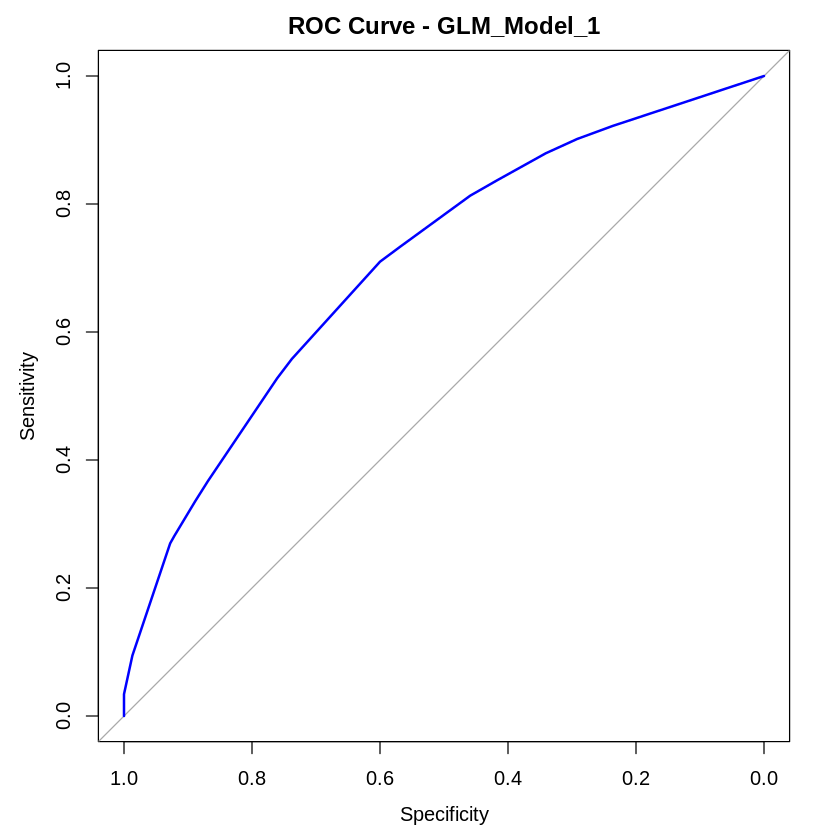

AUC for LMM_Model_1:  0.6955848 


 ROC curve for roc_curve_LMM_Model_2 


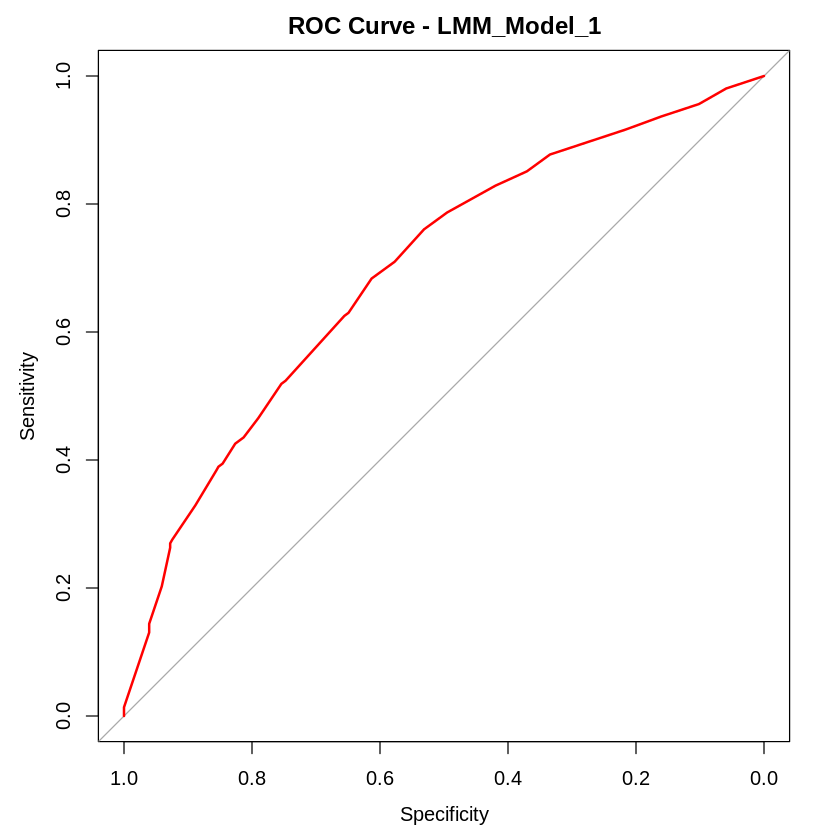

AUC for LMM_Model_2:  0.6955848 


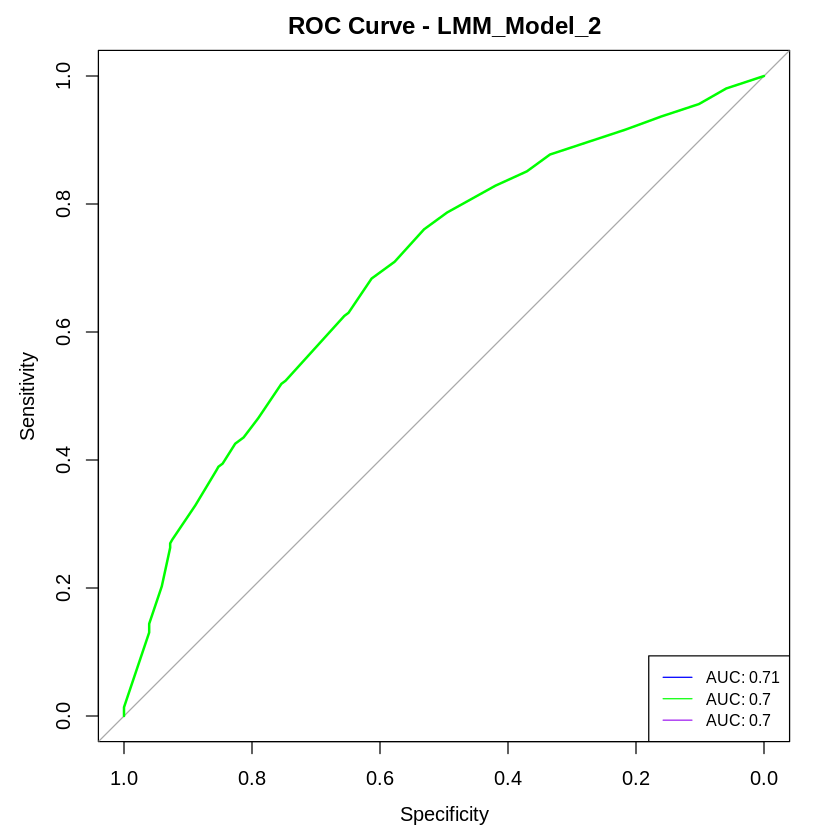

In [109]:
# Examine ROC curves for Logistic model performance
roc_curve_GLM_Model_1 <- roc(Experiment2_forLMM$Correct_answer, fitted(GLM_Model_1))
roc_curve_LMM_Model_1 <- roc(Experiment2_forLMM$Correct_answer, fitted(LMM_Model_1))
roc_curve_LMM_Model_2 <- roc(Experiment2_forLMM$Correct_answer, fitted(LMM_Model_2))

# Plot ROC curves and display AUC for each model
cat("\n\n ROC curve for roc_curve_GLM_Model_1 \n")
plot(roc_curve_GLM_Model_1, main="ROC Curve - GLM_Model_1", col="blue")
cat("AUC for GLM_Model_1: ", auc(roc_curve_GLM_Model_1), "\n")

cat("\n\n ROC curve for roc_curve_LMM_Model_1 \n")
plot(roc_curve_LMM_Model_1, main="ROC Curve - LMM_Model_1", col="red")
cat("AUC for LMM_Model_1: ", auc(roc_curve_LMM_Model_1), "\n")

cat("\n\n ROC curve for roc_curve_LMM_Model_2 \n")
plot(roc_curve_LMM_Model_2, main="ROC Curve - LMM_Model_2", col="green")
cat("AUC for LMM_Model_2: ", auc(roc_curve_LMM_Model_2), "\n")

# Add legends to each plot for better clarity
legend("bottomright", legend = c(paste("AUC:", round(auc(roc_curve_GLM_Model_1), 2)),
                                 paste("AUC:", round(auc(roc_curve_LMM_Model_1), 2)),
                                 paste("AUC:", round(auc(roc_curve_LMM_Model_2), 2))),
       col = c("blue", "green", "purple"), lty = 1, cex = 0.8)

In [110]:
# Then, compare the 2 LMM models with and without random slopes with the GLM model using likelihood ratio tests:
cat("\n\n LMM_Model_1 vs. LMM_Model_2 vs. GLM_Model_1 \n")
anova(LMM_Model_1, LMM_Model_2, GLM_Model_1)



 LMM_Model_1 vs. LMM_Model_2 vs. GLM_Model_1 


,npar,AIC,BIC,logLik,-2*log(L),Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LMM_Model_1,10,1338.704,1390.648,-659.3518,1318.704,NA,NA,NA
LMM_Model_2,12,1342.704,1405.037,-659.3518,1318.704,4.092726e-12,2,1.0000000
GLM_Model_1,36,1369.713,1556.713,-648.8565,1297.713,2.099049e+01,24,0.6392859


In [111]:
# Then compare the LMMs from lme4 to the ANOVA from aov using AIC and BIC for estimating prediction errors
# Calculate AIC and BIC for all models
aic_values <- AIC(anova_model, LMM_Model_1, LMM_Model_2, GLM_Model_1)
bic_values <- BIC(anova_model, LMM_Model_1, LMM_Model_2, GLM_Model_1)
# Combine AIC and BIC into a single dataframe
model_comparison <- data.frame(
  Model = rownames(aic_values), # Model names
  AIC = aic_values$AIC,        # Extract AIC values
  BIC = bic_values$BIC         # Extract BIC values
)
# View the combined AIC and BIC dataframe
cat("\n\n AIC and BIC values for ANOVA and LLMs \n")
print(model_comparison)



 AIC and BIC values for ANOVA and LLMs 
        Model      AIC      BIC
1 anova_model 1407.106 1599.301
2 LMM_Model_1 1338.704 1390.648
3 LMM_Model_2 1342.704 1405.037
4 GLM_Model_1 1369.713 1556.713


## Interpretations
<p>Interpret the data based on the LMM_Model_1 (logistic mixed model) model because it has a better fit (highest log likelihood) than LMM_Model_2 and the lowest AIC and BIC prediction errors compared to the GLM and ANOVA models.</p>

# Decode the blinding to reveal the chatbot identity
When the statistical analysis was completed, this .ipynb file was shared with the independent prompt inputter, LT, who revealed the code.

## Blinded code
ChatbotA = Gemini1.5flash (Basic)<br>
ChatbotB = ChatGPT-4o (Advanced)<br>
ChatbotC = ClaudePro (Advanced)<br>
ChatbotD = ChatGPT-4omini (Basic)<br>
ChatbotE = Gemini1.5pro (Advanced)<br>
ChatbotF = Claude3.5Sonnet (Basic)<br>

<p>Arrange them in alphabetical order with basic and advanced models in adjacent bars:</p>
<ol>
<li> ChatbotD = ChatGPT-4omini (Basic)
<li> ChatbotB = ChatGPT-4o (Advanced)
<li> ChatbotF = Claude3.5Sonnet (Basic)
<li> ChatbotC = ClaudePro (Advanced)
<li> ChatbotA = Gemini1.5flash (Basic)
<li> ChatbotE = Gemini1.5pro (Advanced)
</ol>

## Rebuild Barplots

### Accuracy

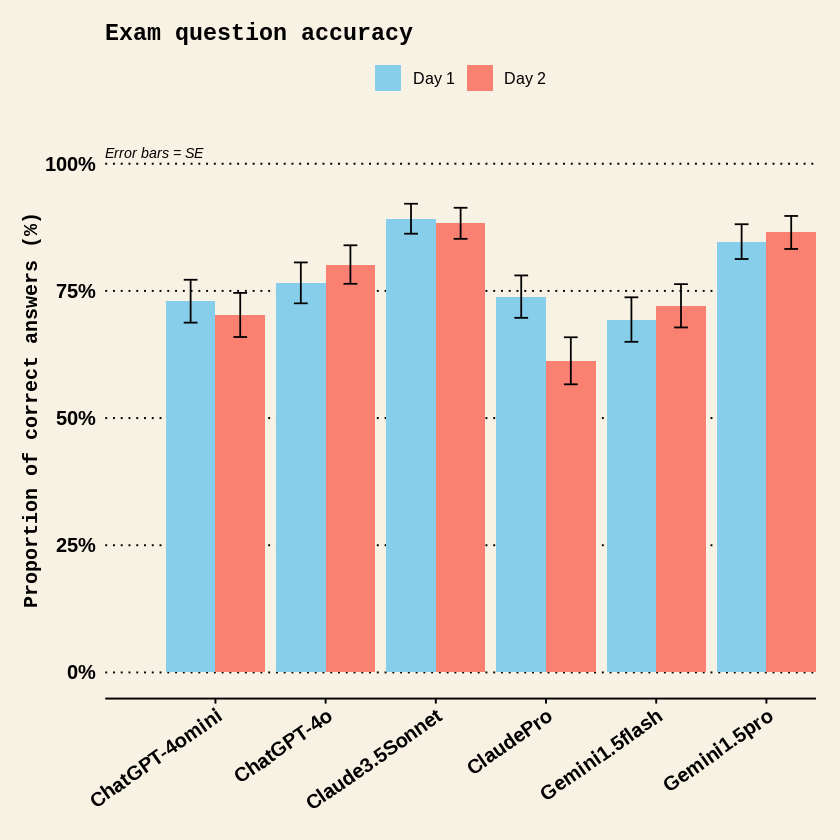

In [112]:
# ChatbotA = Gemini1.5flash (Basic)
# ChatbotB = ChatGPT-4o (Advanced)
# ChatbotC = ClaudePro (Advanced)
# ChatbotD = ChatGPT-4omini (Basic)
# ChatbotE = Gemini1.5pro (Advanced)
# ChatbotF = Claude3.5Sonnet (Basic)
# Then, reorder to: D, B, F, C, A, E
exam_accuracy_totalsUNBLINDED <- data.frame(
  Chatbot = factor(
    rep(c("ChatGPT-4omini", "ChatGPT-4o", "Claude3.5Sonnet",
          "ClaudePro", "Gemini1.5flash", "Gemini1.5pro"), 2),
    levels = c("ChatGPT-4omini", "ChatGPT-4o", "Claude3.5Sonnet",
          "ClaudePro", "Gemini1.5flash", "Gemini1.5pro")
  ),
  ExamTotalAccuracyUNBLINDED = c(
    ChatbotD_ExamAccuracyTotalTest1, ChatbotB_ExamAccuracyTotalTest1, ChatbotF_ExamAccuracyTotalTest1,
    ChatbotC_ExamAccuracyTotalTest1, ChatbotA_ExamAccuracyTotalTest1, ChatbotE_ExamAccuracyTotalTest1,
    ChatbotD_ExamAccuracyTotalTest2, ChatbotB_ExamAccuracyTotalTest2, ChatbotF_ExamAccuracyTotalTest2,
    ChatbotC_ExamAccuracyTotalTest2, ChatbotA_ExamAccuracyTotalTest2, ChatbotE_ExamAccuracyTotalTest2
  ),
  Test = rep(c("Test 1", "Test 2"), each = 6)
)

# Calculate standard error
exam_accuracy_totalsUNBLINDED <- exam_accuracy_totalsUNBLINDED %>%
  mutate(SE = sqrt(ExamTotalAccuracyUNBLINDED * (1 - ExamTotalAccuracyUNBLINDED) / maximalAccuracyExamTotal))  # the standard error of the proportion of correct answers

# Create the updated combined plot for both Test 1 and Test 2
accuracyplot_FINALPLOT <- ggplot(exam_accuracy_totalsUNBLINDED, aes(x = Chatbot, y = ExamTotalAccuracyUNBLINDED, fill = Test)) +
  geom_bar(stat = "identity", position = "dodge") +  # Create side-by-side bars
  geom_errorbar(aes(ymin = ExamTotalAccuracyUNBLINDED - SE, ymax = ExamTotalAccuracyUNBLINDED + SE),
                position = position_dodge(0.9), width = 0.25) +  # Add error bars
  labs(y = "Proportion of correct answers (%)",,
       title = "Exam question accuracy",
       fill = "Test"  # This sets the title of the fill legend
  ) +
  scale_y_continuous(labels = scales::percent_format(accuracy = 1), limits = c(0, 1.03)) +  # Adjust y-axis
  scale_x_discrete(expand = expansion(add = c(0, 0))) +  # Adjust space between factors on the x-axis
  scale_fill_manual(values = c("Test 1" = "skyblue", "Test 2" = "salmon"), labels = c("Day 1", "Day 2")) + # Set colors and labels
  theme_wsj() +
  theme(
    plot.title = element_text(size = 14, face = "bold", hjust = 0),
    axis.text.x = element_text(color = "black", angle = 35, hjust = 1, size = 12),  # Adjust angle for long chatbot names
    axis.title.x = element_blank(), # Removes the x-axis label
    axis.text.y = element_text(color = "black", size = 12),
    axis.title.y = element_text(color = "black", face = "bold", size = 12)
  ) +
  guides(fill = guide_legend(title = NULL))  + # Remove legend title
  annotate( # Add custom text
    "text",
    x = 0, y = 1.03,  # Coordinates for placement
    label = "Error bars = SE",
    hjust = 0, vjust = 1,  # Horizontal and vertical justification (aligns the text to the left and top)
    size = 3, fontface = "italic", color = "black"
  )

# Show the plot
accuracyplot_FINALPLOT

# Save as jpgs
ggsave("accuracyplot_FINALPLOT.jpg", plot = accuracyplot_FINALPLOT, width = 8, height = 6, units = "in", dpi = 300)

In [113]:
# print the data frame
cat("Exam question accuracy")
exam_accuracy_totalsUNBLINDED

Exam question accuracy

,Chatbot,ExamTotalAccuracyUNBLINDED,Test,SE
,<fct>,<dbl>,<chr>,<dbl>
Chatbot_D_Day1_Answer_score,ChatGPT-4omini,0.7297297,Test 1,0.04215205
Chatbot_B_Day1_Answer_score,ChatGPT-4o,0.7657658,Test 1,0.04019867
Chatbot_F_Day1_Answer_score,Claude3.5Sonnet,0.8918919,Test 1,0.02947296
Chatbot_C_Day1_Answer_score,ClaudePro,0.7387387,Test 1,0.04169860
Chatbot_A_Day1_Answer_score,Gemini1.5flash,0.6936937,Test 1,0.04375225
Chatbot_E_Day1_Answer_score,Gemini1.5pro,0.8468468,Test 1,0.03418251
Chatbot_D_Day2_Answer_score,ChatGPT-4omini,0.7027027,Test 2,0.04338302
Chatbot_B_Day2_Answer_score,ChatGPT-4o,0.8018018,Test 2,0.03783745
Chatbot_F_Day2_Answer_score,Claude3.5Sonnet,0.8828829,Test 2,0.03052110
